In [1]:
import tushare as ts
import pandas as pd


## 货币供给
货币供应量M1和M2的情况。首先了解下货币供应量的几个指标含义。根据货币金融学和央行实践，整个经济体系的货币供应大致可分为M0、M1、M2及M3。  

M0：居民持有的货币（即市场上流通的货币）。  

M1：居民持有的货币＋银行客户的活期存款。M1又称为狭义货币供应量。  

M2：M1＋银行客户的储蓄及定期存款，以及由银行发行的可转让存款证（由非银行持有），又称为广义货币供应量。  

M3：M1＋M2＋有限制牌照银行及接受存款公司的客户存款，及由上述机构发行的存款证（由非银行持有）。  

从M1与M2的定义可见，两者的差异只在于M1不包括储蓄存款和定期存款，因此M1与M2增幅的差异，应由储蓄存款和定期存款变动所引起。M1反映居民和企业资金松紧变化，是经济周期波动的先行指标，流动性仅次于M0；  
M2流动性偏弱，但反映的是社会总需求的变化和未来通货膨胀的压力状况，通常所说的货币供应量，主要指M2。

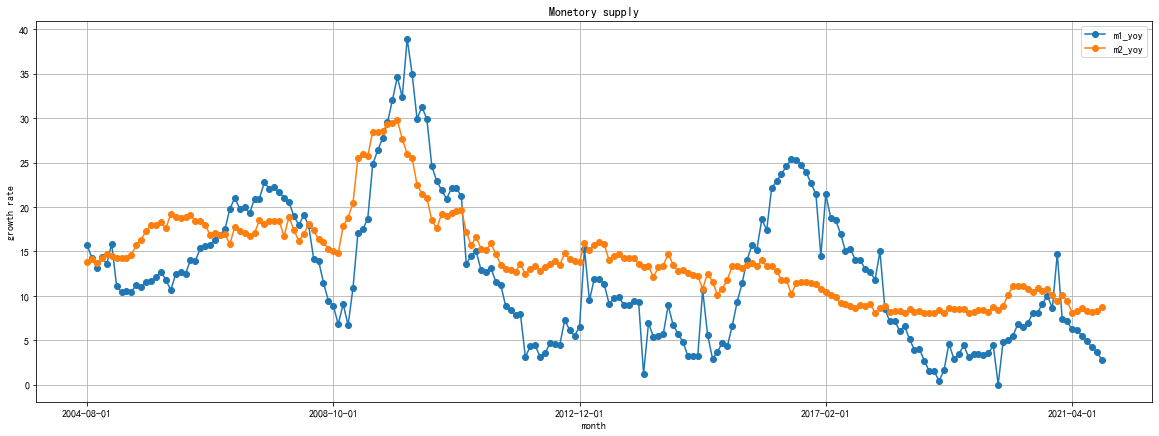

In [8]:
from  datetime import datetime,date
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

class Monetary_supply(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
    
    def push_data(self):   
        self.df['month'] = df['month'].apply(lambda x:datetime.strptime(x,'%Y%m')) #把字符串转为时间序列，注意'%Y%m'格式必须符合原字符串形式
        self.df.set_index('month',inplace=True)   #设置索引
        self.df.sort_index(inplace=True) #索引排序 
        str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str + '-monetary.csv') #存储文件
         
    def plot_monetary(self,data):
        """
        m1_yoy:同比
        m1_mom_pc：环比 
        """
        data[['m1_yoy','m2_yoy']].plot(figsize = (20,7),ylabel= 'growth rate',title='Monetory supply',grid=True,marker='o')  
#         print(data.m1_yoy)
#         print('**************')
#         print(data.m2_yoy)
        
if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.cn_m(start_m='200408', end_m='202111')
    
    ms= Monetary_supply(df)
    str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
    
    data = pd.read_csv(str + '-monetary.csv',index_col='month')  
    data = data.loc['2004-01-01':'2021-11-28']  #选取时间段
    ms.plot_monetary(data) 
 

## 货币投放与回笼

In [2]:
import akshare as ak
from datetime import datetime
df = ak.macro_china_hb()
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-put_monetary.csv') #存储文件  
df.tail()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  8.10it/s]


,start_date,net_put_in,back,end_date,put_in,date
1276,2021-09-20,3200,1400,2021-09-26,4600,2021-39
1277,2021-09-27,1800,2200,2021-10-03,4000,2021-40
1278,2021-10-04,-3200,3400,2021-10-10,200,2021-41
1279,2021-10-11,-3700,4200,2021-10-17,500,2021-42
1280,2021-10-18,2700,500,2021-10-24,3200,2021-43


In [81]:
df = pd.read_csv(str + '-put_monetary.csv',index_col='start_date')
df.sort_index(inplace=True)
df = df.loc['2020-01-01':]
df['net_put_in'].sum()

-180.0

## 央行公开市场操作

In [90]:
import akshare as ak
df = ak.macro_china_gksccz()
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-trading_method.csv') #存储文件  

100%|██████████| 3/3 [00:00<00:00, 12.20it/s]


In [91]:
df = pd.read_csv(str + '-trading_method.csv',index_col='operation_from_date')
df.sort_index(inplace=True)
df = df.loc['2020-01-01':]
df[df['trading_method'].str.startswith('逆')].deal_amount.sum()

187290

In [92]:
df[df['trading_method'].str.startswith('正')].deal_amount.sum()

0

In [93]:
df.tail(15)

,Unnamed: 0,rate,trading_method,deal_amount,period
operation_from_date,,,,,
2021-08-26,2218,2.2,逆回购,500,7
2021-08-27,2219,2.2,逆回购,500,7
2021-08-30,2220,2.2,逆回购,500,7
2021-08-31,2221,2.2,逆回购,500,7
2021-09-01,2222,2.2,逆回购,100,7
2021-09-02,2223,2.2,逆回购,100,7
2021-09-03,2224,2.2,逆回购,100,7
2021-09-06,2225,2.2,逆回购,100,7
2021-09-07,2226,2.2,逆回购,100,7


##  存款准备金率

<AxesSubplot:xlabel='月份'>

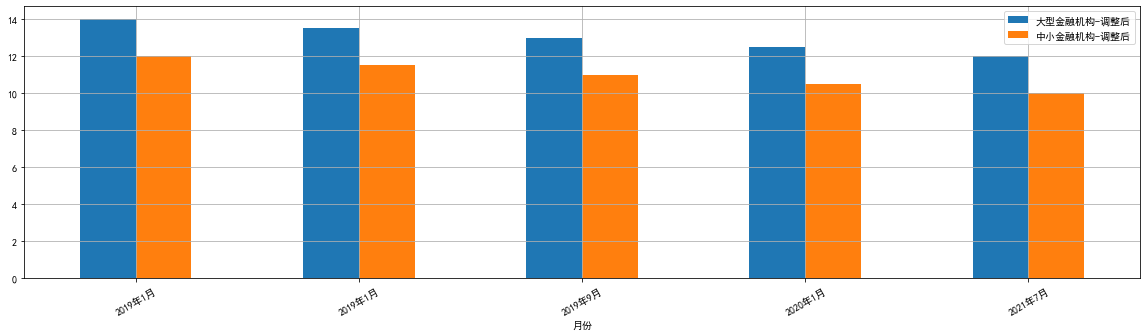

In [41]:
import akshare as ak
df = ak.macro_china_reserve_requirement_ratio()
df.index= df.pop('月份')
df.sort_index(ascending=True,inplace=True)
df  = df.loc['2019-01-01':]
df[['大型金融机构-调整后','中小金融机构-调整后']].plot(kind='bar',figsize=(20,5),grid=True,rot=30)


## CPI

https://baijiahao.baidu.com/s?id=1677323394881943156&wfr=spider&for=pc  

https://zhuanlan.zhihu.com/p/88429370    

In [ ]:
生猪价格 
https://www.zhihu.com/question/459985322/answer/1936108034
中国现在是通缩还是通胀
https://www.zhihu.com/question/319851932/answer/1980543093
PMI、CPI、PPI 之间的相互关系是什么
https://www.zhihu.com/question/19765287/answer/135239655


            nt_val  nt_yoy  nt_mom  nt_accu  town_val  town_yoy  town_mom  \
month                                                                       
2021-01-01    99.7    -0.3     1.0     99.7      99.6      -0.4       1.0   
2021-02-01    99.8    -0.2     0.6     99.7      99.8      -0.2       0.6   
2021-03-01   100.4     0.4    -0.5    100.0     100.5       0.5      -0.5   
2021-04-01   100.9     0.9    -0.3    100.2     101.0       1.0      -0.2   
2021-05-01   101.3     1.3    -0.2    100.4     101.4       1.4      -0.1   

            town_accu  cnt_val  cnt_yoy  cnt_mom  cnt_accu  
month                                                       
2021-01-01       99.6     99.9     -0.1      1.1      99.9  
2021-02-01       99.7     99.9     -0.1      0.4      99.9  
2021-03-01       99.9    100.4      0.4     -0.6     100.0  
2021-04-01      100.2    100.7      0.7     -0.5       0.0  
2021-05-01      100.4    101.1      1.1     -0.3       0.0  


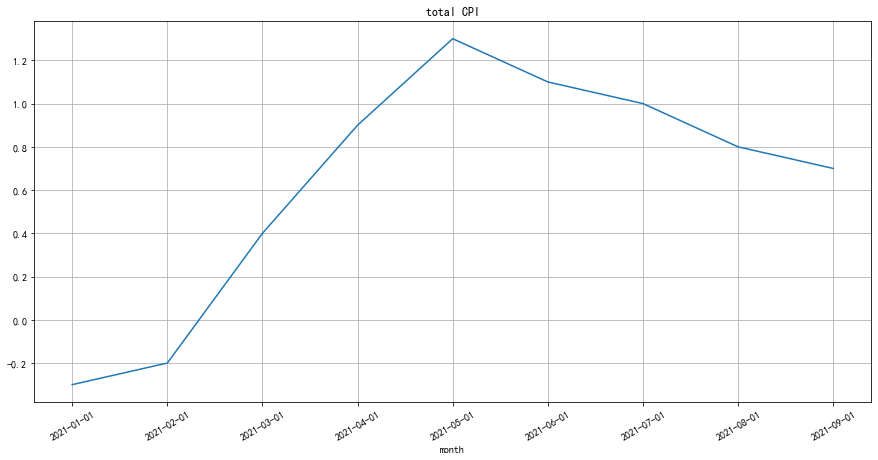

In [20]:
from  datetime import datetime,date
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

class Inflation(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['month'] = df['month'].apply(lambda x:datetime.strptime(x,'%Y%m')) #把字符串转为时间序列，注意'%Y%m'格式必须符合原字符串形式
        self.df.set_index('month',inplace=True)   #设置索引
        self.df.sort_index(inplace=True) #索引排序 
        str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str + '-inflation_cpi.csv') #存储文件    
        
    def plot_total_cpi(self,data):
        data.nt_yoy.plot(figsize=(15,7),title='total CPI',grid=True,rot=30)
        print(data.head())
        
    def plot_total_ppi(self,data):
        data.ppi_yoy.plot(figsize=(15,7),title="total PPI")
        
    def plot_consumer_product_ppi(self,data):
        """
        ppi_mp_yoy:生产资料同比 
        ppi_cg_yoy：生活资料同比 
        """
        data[['ppi_mp_yoy','ppi_cg_yoy']].plot(figsize=(15,7),title="consumer and production PPI",grid=True,rot=30)
        
    def plot_product_ppi(self,data): 
        """
        ppi_mp_qm_yoy:挖掘业
        ppi_mp_rm_yoy：原料业
        ppi_mp_p_yoy:加工业
        """
        data[['ppi_mp_qm_yoy','ppi_mp_rm_yoy','ppi_mp_p_yoy']].plot(figsize=(15,7),title=" production category PPI")

if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.cn_cpi(start_m='200901', end_m='202110')
    
    inflation = Inflation(df)
    str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str + '-inflation_cpi.csv',index_col='month') 
    data = data.loc['2021-01-01':'2021-10-28']  #选取时间段
    
    inflation.plot_total_cpi(data)
  

## 商品零售价格指数

In [3]:
import akshare as ak
df = ak.macro_china_retail_price_index()
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-price_index.csv') #存储文件    

100%|██████████| 128/128 [01:32<00:00,  1.39it/s]


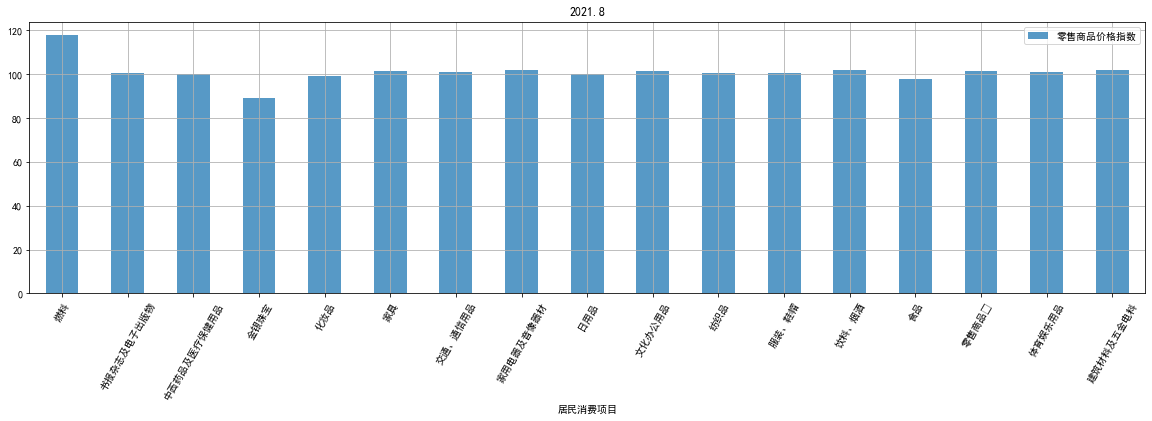

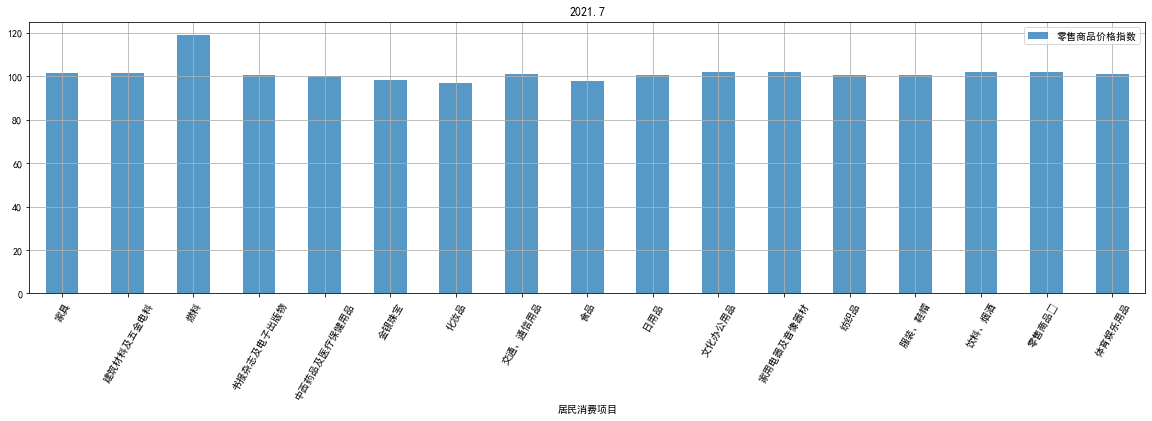

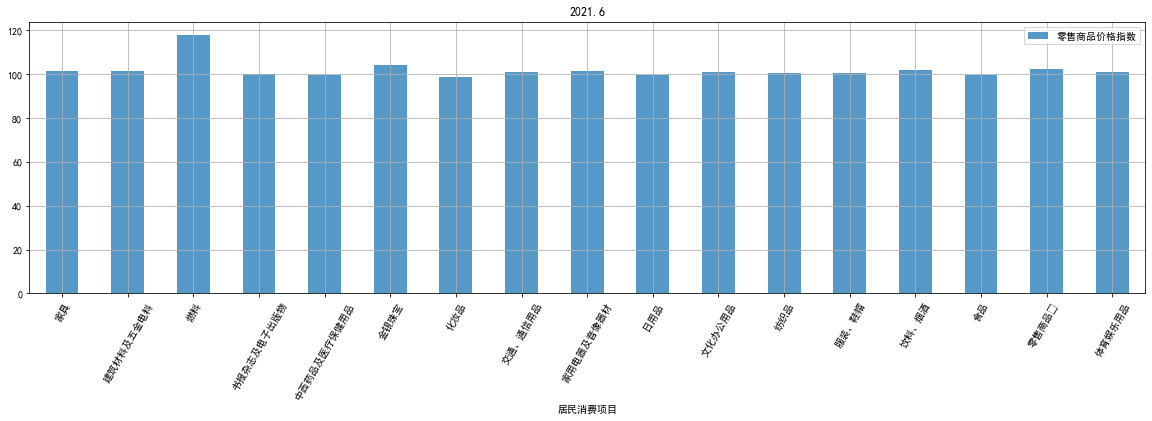

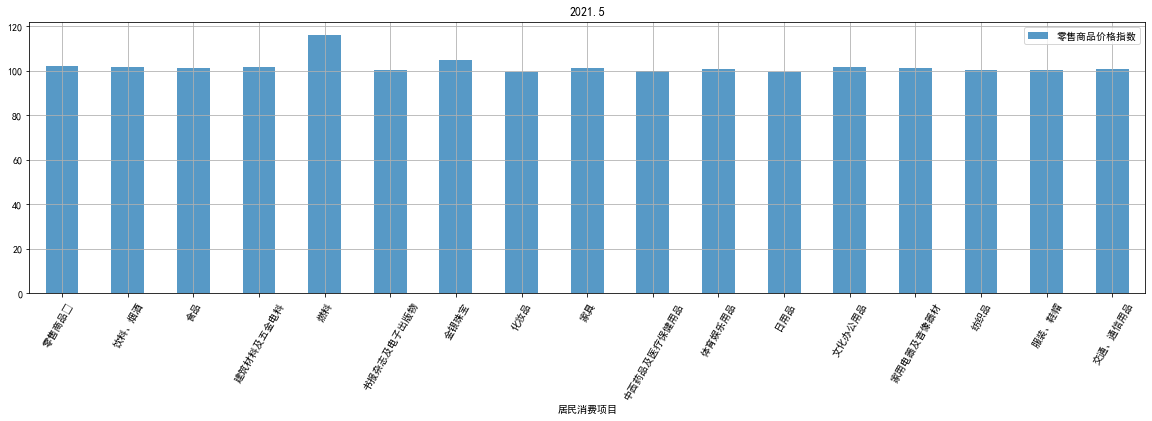

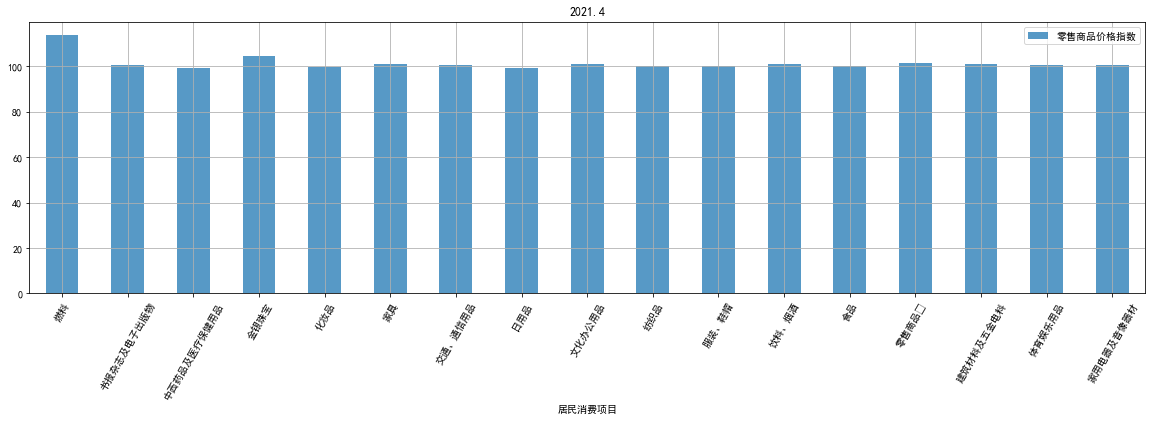

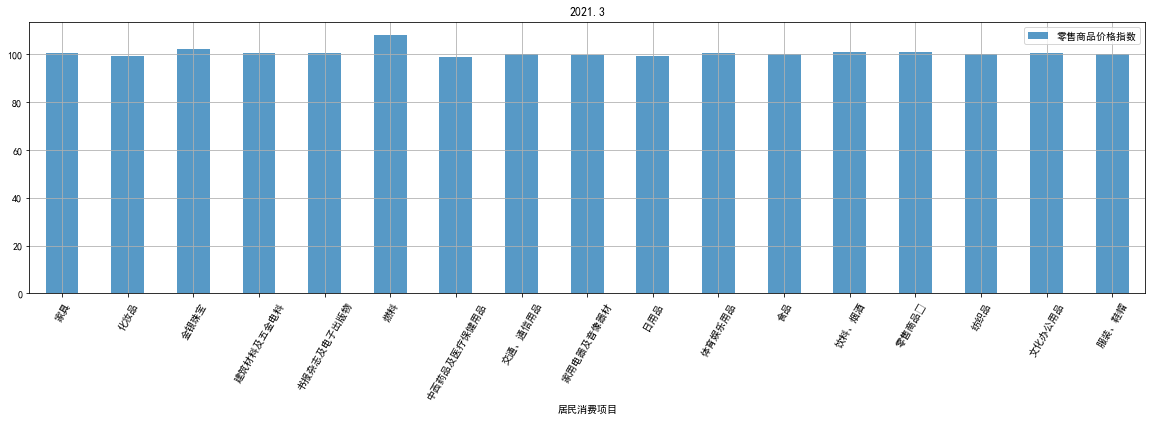

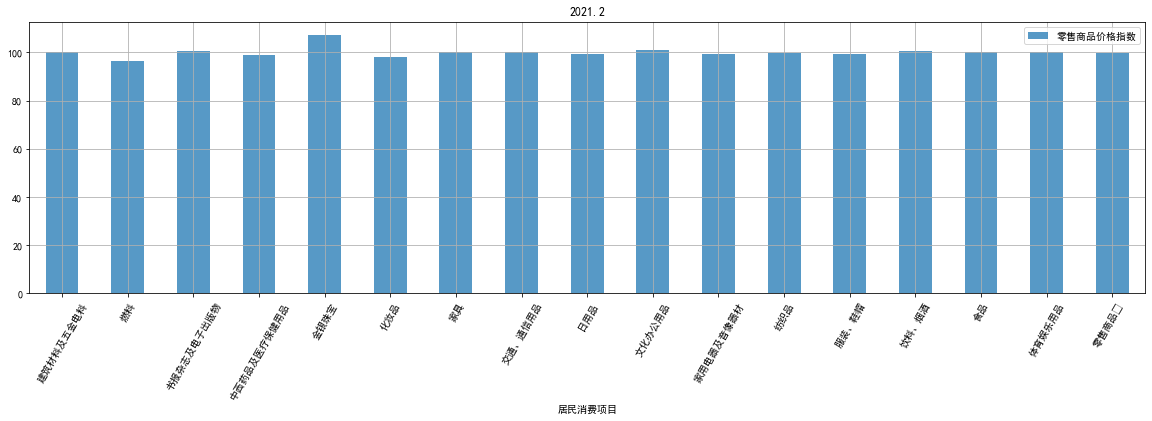

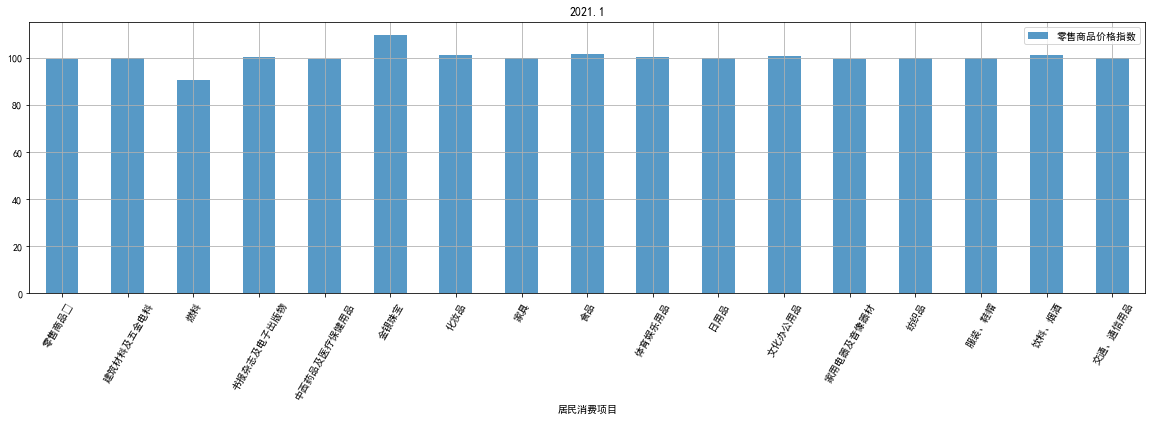

In [4]:
import matplotlib.pyplot as plt

str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df = pd.read_csv(str + '-price_index.csv') 

df['统计月份'] = df['统计月份'].astype('str')
df = df[df['统计月份'].str.contains('2021')]


df.index = df.pop('统计月份')
cols= df.index.unique()

df.sort_index(ascending=True,inplace=True)

for index in cols: 
    data =df.loc[index].copy()
    data.pop('Unnamed: 0')
    cols= df['居民消费项目'].to_list()
    data.set_index('居民消费项目',inplace=True)



    data.plot(kind='bar',figsize=(20,5),alpha=0.75, rot=60,grid=True,title=index)

## PPI

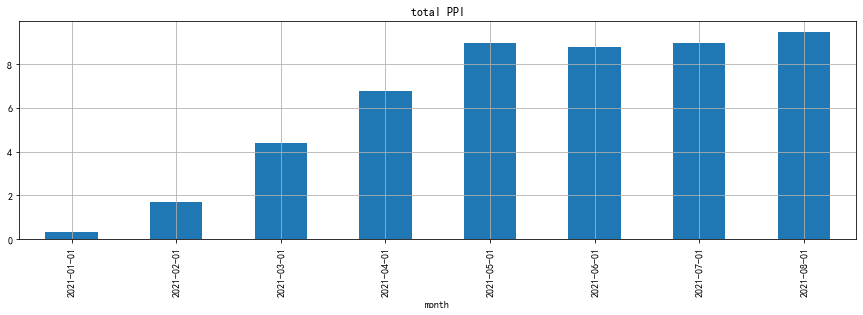

In [6]:
from  datetime import datetime,date
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

class Inflation(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['month'] = df['month'].apply(lambda x:datetime.strptime(x,'%Y%m')) #把字符串转为时间序列，注意'%Y%m'格式必须符合原字符串形式
        self.df.set_index('month',inplace=True)   #设置索引
        self.df.sort_index(inplace=True) #索引排序 
        str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str + '-inflation_ppi.csv') #存储文件    
        
    
        
    def plot_total_ppi(self,data):
        data.ppi_yoy.plot(figsize=(15,4),title="total PPI",kind= 'bar',grid=True)
#         print(data.ppi_yoy)
        
    def plot_consumer_product_ppi(self,data):
        """
        ppi_mp_yoy:生产资料同比 
        ppi_cg_yoy：生活资料同比 
        """
        data[['ppi_mp_yoy','ppi_cg_yoy']].plot(figsize=(15,4),title="consumer and production PPI")
        
    def plot_product_ppi(self,data): 
        """
        ppi_mp_qm_yoy:挖掘业
        ppi_mp_rm_yoy：原料业
        ppi_mp_p_yoy:加工业
        """
        data[['ppi_mp_qm_yoy','ppi_mp_rm_yoy','ppi_mp_p_yoy']].plot(figsize=(15,4),title=" production category PPI")
        
    def plot_consumer_ppi(self,data):
        """
        ppi_cg_f_yoy：食品
        ppi_cg_c_yoy：衣着
        ppi_cg_adu_yoy:一般日用品
        ppi_cg_dcg_yoy:耐用消费品
        """        
        data[['ppi_cg_f_yoy','ppi_cg_c_yoy','ppi_cg_adu_yoy','ppi_cg_dcg_yoy']].plot(figsize=(15,4),title="eonsumer category PPI")        

if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.cn_ppi(start_m='200901', end_m='202109')
    
    inflation = Inflation(df)
    str = datetime.now().strftime("%Y-%m-%d")
    data = pd.read_csv(str + '-inflation_ppi.csv',index_col='month') 
    data = data.loc['2021-01-01':'2021-09-10']  #选取时间段
  
    
    inflation.plot_total_ppi(data)
#     inflation.plot_product_ppi(data)
#     inflation.plot_consumer_ppi(data)
#     inflation.plot_consumer_product_ppi(data)


## GDP 

In [1]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pro = ts.pro_api()

df2 = pro.cn_gdp(start_q='2019Q1', end_q='2021Q3')
df2.head()

,quarter,gdp,gdp_yoy,pi,pi_yoy,si,si_yoy,ti,ti_yoy
0,2021Q3,823131.0,9.8,51430.0,7.4,320940.0,10.6,450761.0,0.0
1,2021Q2,532167.0,12.7,28401.0,7.8,207154.0,14.8,296611.0,0.0
2,2021Q1,249310.0,18.3,11332.0,8.1,92623.0,24.4,145355.0,15.6
3,2020Q4,1015986.2,2.3,77754.1,3.0,384255.3,2.6,553976.8,2.1
4,2020Q3,722786.4,0.7,48122.5,2.3,274266.7,0.9,400397.1,0.4


<AxesSubplot:xlabel='quarter'>

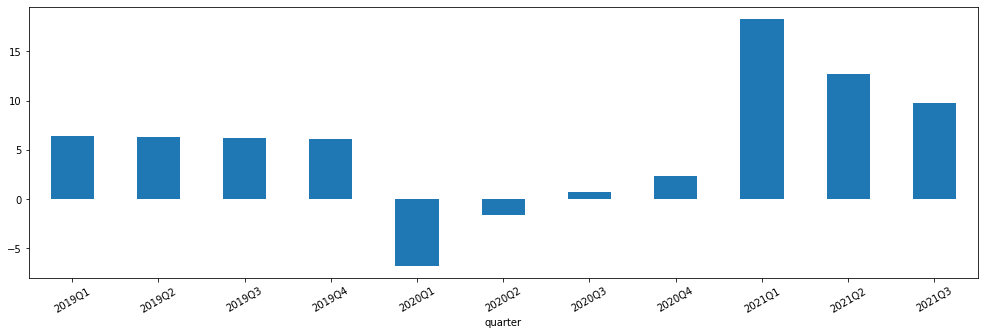

In [2]:
df2.set_index('quarter',inplace=True)
df2.sort_index(inplace=True)
df2.gdp_yoy.plot(kind = 'bar',figsize= (17,5),rot=30)

<AxesSubplot:xlabel='quarter'>

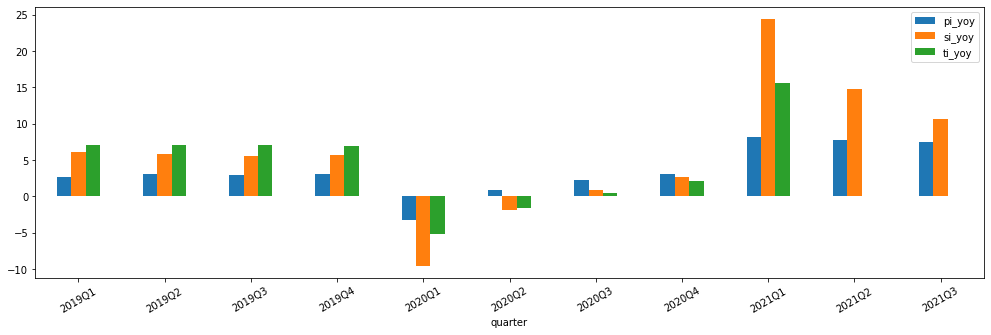

In [3]:
"""
pi_yoy:第一产业
si_yoy：第二产业
ti_yoy：第三产业
"""
df2[['pi_yoy','si_yoy','ti_yoy']].plot(kind = 'bar',figsize= (17,5),rot=30)

## 工业增加值增长

<AxesSubplot:xlabel='月份'>

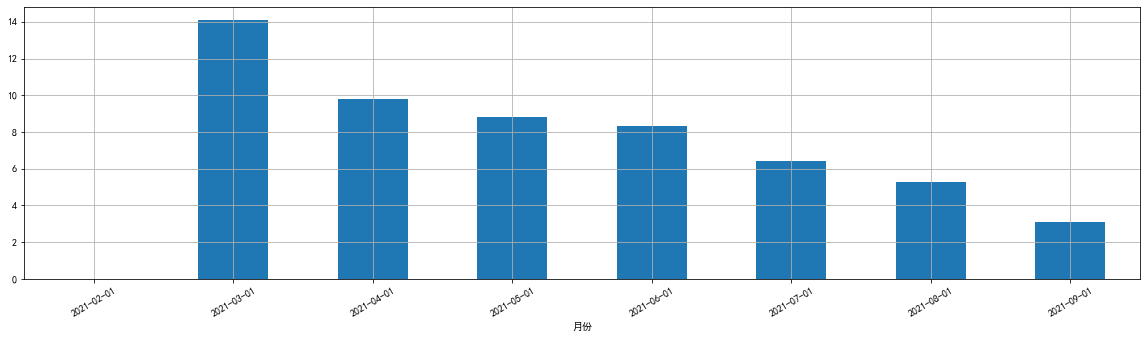

In [4]:
import akshare as ak
df = ak.macro_china_gyzjz()
df.index = df.pop('月份')
df.sort_index(inplace=True)
df= df.loc['2021-01-01':]
df['同比增长'].plot(figsize=(20,5),rot=30,kind='bar',grid=True)

## 汇率 

In [11]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pro = ts.pro_api()
df3 = pro.fx_daily(ts_code='USDCNH.FXCM', start_date='20040101', end_date='20210910')
df3.head()


,ts_code,trade_date,bid_open,bid_close,bid_high,bid_low,ask_open,ask_close,ask_high,ask_low,tick_qty
0,USDCNH.FXCM,20210910,6.45050,6.44334,6.45467,6.42579,6.45208,6.44712,6.45519,6.42642,148251
1,USDCNH.FXCM,20210909,6.45421,6.45050,6.46205,6.44610,6.45928,6.45208,6.46263,6.44670,141904
2,USDCNH.FXCM,20210908,6.46115,6.45421,6.46308,6.45405,6.46247,6.45928,6.46365,6.45464,133252
3,USDCNH.FXCM,20210907,6.44857,6.46115,6.46450,6.44713,6.45283,6.46247,6.46511,6.44835,136600
4,USDCNH.FXCM,20210906,6.43115,6.44857,6.45463,6.43117,6.43945,6.45283,6.45525,6.43590,93954


date
2021-08-31    6.4679
2021-09-01    6.4680
2021-09-02    6.4594
2021-09-03    6.4577
2021-09-06    6.4529
2021-09-07    6.4533
2021-09-08    6.4674
2021-09-09    6.4615
2021-09-10    6.4566
2021-09-13    6.4497
2021-09-14    6.4500
2021-09-15    6.4492
2021-09-16    6.4330
2021-09-17    6.4527
2021-09-22    6.4693
Name: USD/CNY, dtype: float64


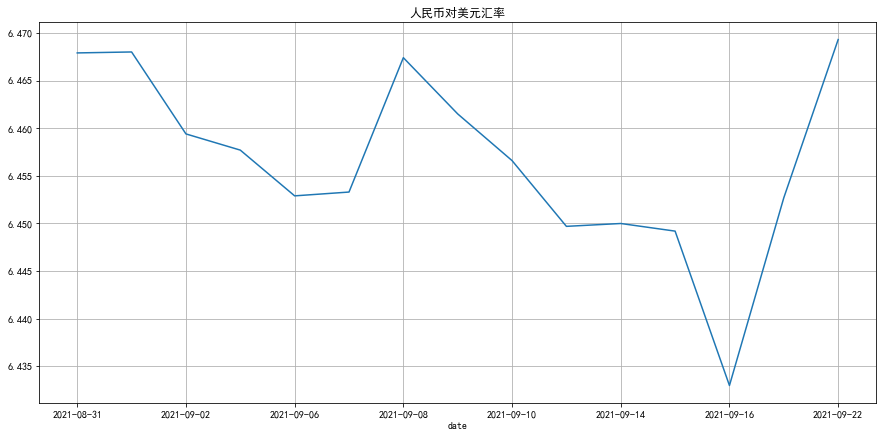

In [16]:
from opendatatools import fx

"""
中间历史价格
"""

df1,msg = fx.get_hist_cny_cpr()
df1.sort_index(inplace=True)
df1['USD/CNY'] = df1['USD/CNY'].astype('float')
df1['USD/CNY'].plot(figsize=(15,7),grid=True,title='人民币对美元汇率')
print(df1['USD/CNY'])

,美元/人民币_中间价,美元/人民币_涨跌幅,欧元/人民币_中间价,欧元/人民币_涨跌幅,100日元/人民币_中间价,100日元/人民币_涨跌幅,港元/人民币_中间价,港元/人民币_涨跌幅,英镑/人民币_中间价,英镑/人民币_涨跌幅,...,人民币/瑞典克朗_中间价,人民币/瑞典克朗_涨跌幅,人民币/挪威克朗_中间价,人民币/挪威克朗_涨跌幅,人民币/土耳其里拉_中间价,人民币/土耳其里拉_涨跌幅,人民币/墨西哥比索_中间价,人民币/墨西哥比索_涨跌幅,人民币/泰铢_定价,人民币/泰铢_涨跌幅
2018-02-06,6.3072,NaN,7.8035,NaN,5.7720,NaN,0.80650,NaN,8.8004,NaN,...,1.2646,NaN,1.2424,NaN,0.60032,NaN,2.9830,NaN,5.0191,NaN
2018-02-07,6.2882,-190.0,7.7784,-251.0,5.7323,-397.0,0.80419,-23.1,8.7648,-356.0,...,1.2654,8.0,1.2438,14.0,0.60005,-2.7,2.9646,-184.0,5.0178,-13.0
2018-02-08,6.2822,-60.0,7.7007,-777.0,5.7446,123.0,0.80359,-6.0,8.7083,-565.0,...,1.2880,226.0,1.2598,160.0,0.60624,61.9,2.9932,286.0,5.0429,251.0
2018-02-09,6.3194,372.0,7.7447,440.0,5.8192,746.0,0.80815,45.6,8.8057,974.0,...,1.2829,-51.0,1.2526,-72.0,0.60518,-10.6,2.9868,-64.0,5.0406,-23.0
2018-02-12,6.3001,-193.0,7.7183,-264.0,5.7935,-257.0,0.80570,-24.5,8.7042,-1015.0,...,1.2850,21.0,1.2664,138.0,0.60608,9.0,2.9722,-146.0,5.0310,-96.0


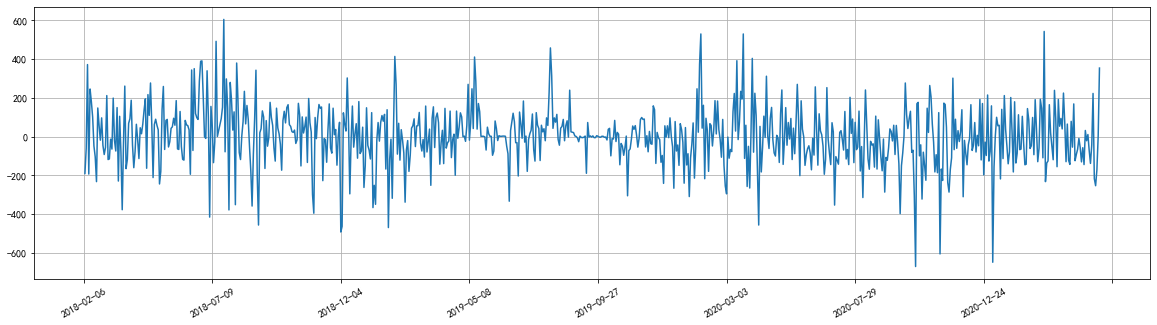

In [22]:
import akshare as ak
df = ak.macro_china_rmb()

df = df.loc['2018-01-01':]
df['美元/人民币_涨跌幅'].plot(figsize=(20,5),grid=True,rot=30)
df.head()

<AxesSubplot:>

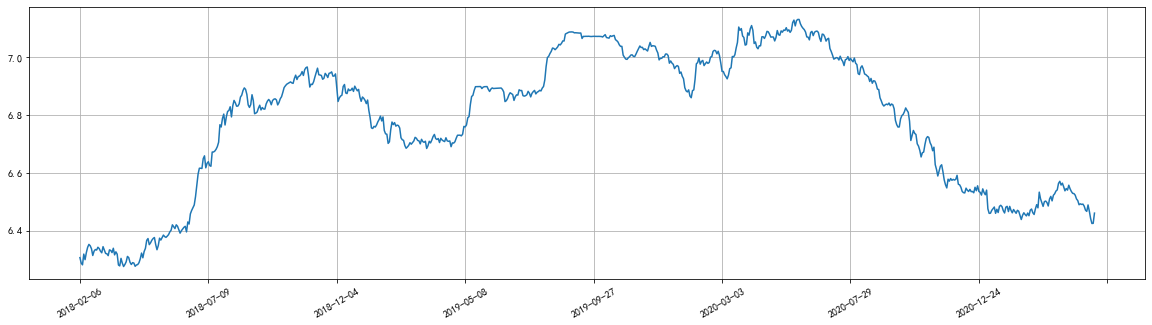

In [23]:
df['美元/人民币_中间价'].plot(figsize=(20,5),grid=True,rot=30)

## 外汇储备

<AxesSubplot:xlabel='index'>

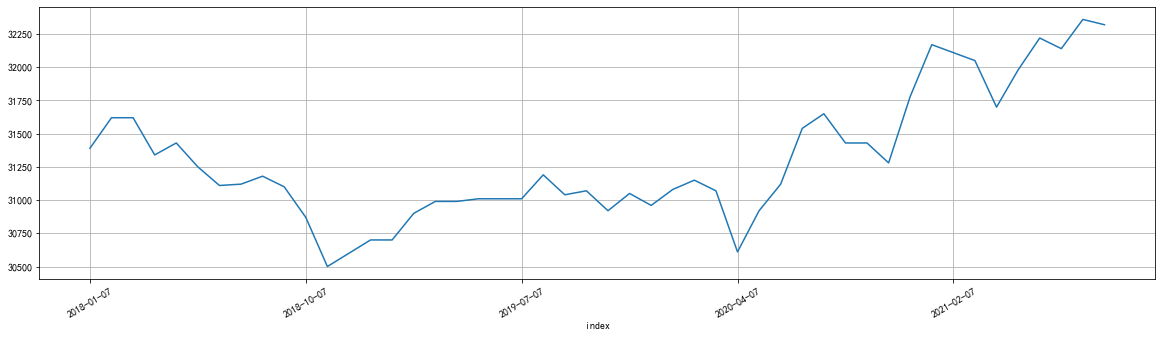

In [24]:
import akshare as ak
import pandas as pd 
import numpy as np 
df = ak.macro_china_fx_reserves_yearly()
data= pd.DataFrame(df)

data.reset_index(inplace=True)
data['index'] = data['index'].astype('str')

# data = data[data['index'].str.startswith('202')]
# data[data.isnull().T.any()]

data.loc[data['fx_reserves'] == 0,'fx_reserves'] = np.nan

data['fx_reserves'] = data['fx_reserves'].fillna(method= 'ffill')
data.set_index('index',inplace=True)

data  = data.loc['2018-01-01':]
data['fx_reserves'].plot(figsize=(20,5),grid=True,rot=30)

## 黄金储备

100%|██████████| 11/11 [00:02<00:00,  5.13it/s]


<AxesSubplot:xlabel='统计时间'>

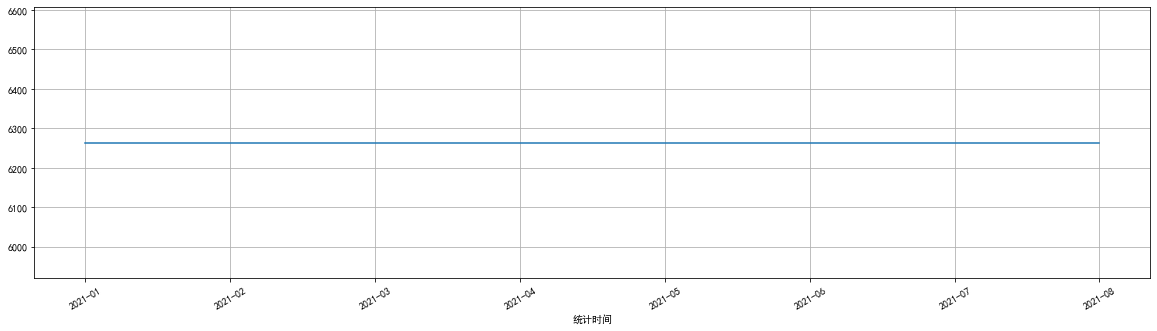

In [235]:
import akshare as ak
from datetime import datetime 
df = ak.macro_china_foreign_exchange_gold()

df['统计时间'] = df['统计时间'].apply(lambda x: datetime.strptime(x,'%Y.%m'))
df['统计时间'] = df['统计时间'].apply(lambda x: datetime.strftime(x,'%Y-%m'))
df['黄金储备'] = df['黄金储备'].astype('float')
df['国家外汇储备'] = df['国家外汇储备'].astype('float')
df.index = df.pop('统计时间')
df.sort_index(inplace=True)
df = df.loc['2021-01':]
df['黄金储备'].plot(figsize=(20,5),grid=True,rot=30)

# plt.show()
# df.head()

<AxesSubplot:xlabel='统计时间'>

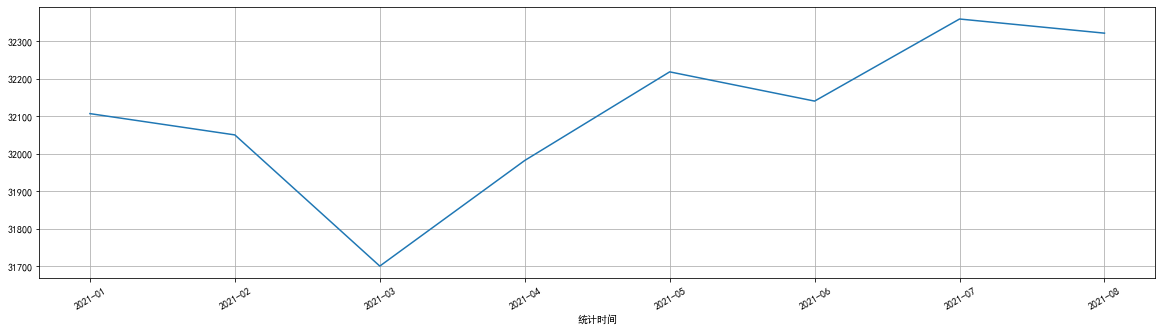

In [236]:
df['国家外汇储备'].plot(figsize=(20,5),grid=True,rot=30)

## SHIBOR

          Unnamed: 0     on     1w     2w     1m     3m     6m     9m     1y  \
date                                                                           
20211029           4  2.142  2.299  2.414  2.398  2.449  2.536  2.669  2.782   
20211101           3  2.030  2.168  2.158  2.398  2.449  2.537  2.671  2.783   
20211102           2  2.126  2.185  2.205  2.394  2.450  2.539  2.673  2.783   
20211103           1  2.000  2.137  2.186  2.397  2.452  2.541  2.675  2.784   
20211104           0  1.886  2.132  2.146  2.397  2.451  2.542  2.675  2.784   

            3m_avg  
date                
20211029  2.456066  
20211101  2.456066  
20211102  2.456066  
20211103  2.456066  
20211104  2.456066  


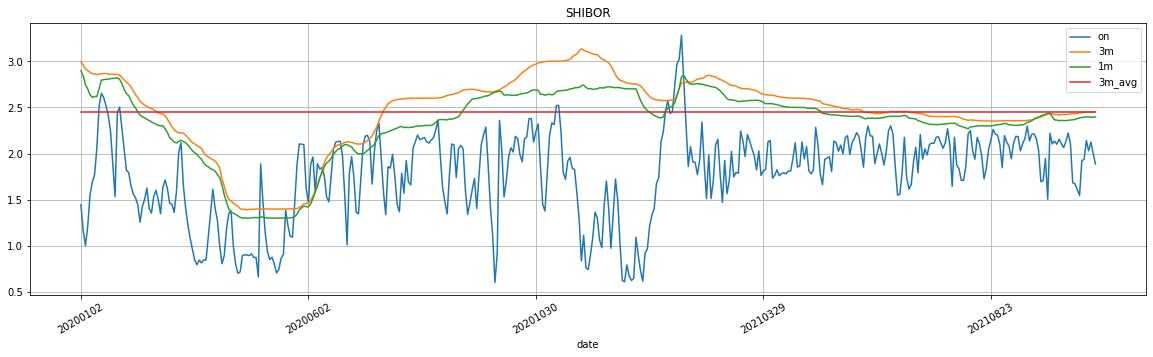

In [1]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
warnings.filterwarnings('ignore')
%matplotlib inline


class Shibor(object):
    def __init__(self,data):
        self.df = data
        self.push_data()
    def push_data(self):             
        self.df.sort_index(ascending = True,inplace= True)
        str0 = 'shibor'
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '.csv') #存储文件 
        
    def plot(self,data):        
        data['3m_avg'] = data['3m'].mean()              
        data[['on','3m','1m','3m_avg']].plot(figsize= (20,5),title='SHIBOR',grid=True,rot=30)
        print(data.tail())
        
if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.shibor(start_date='20000101', end_date='20211106')   
#     print(df.tail())
    shibor = Shibor(df)
    
    str0 = 'shibor'
    str1 =  datetime.now().strftime("%Y-%m-%d") 
    data = pd.read_csv(str0 +'-' +str1 + '.csv')
    
    data['date'] = data.date.astype('str')
    data.index = data.pop('date')
    data.sort_index(ascending = True,inplace= True) 
    
    data = data.loc['20200101':'20211106']  
    
    shibor.plot(data) 
        
        
        
        

## LPR 数据

            LPR1Y  LPR5Y  RATE_1  RATE_2
TRADE_DATE                              
2019-01-02   4.31    NaN    4.35     4.9
2019-01-03   4.31    NaN    4.35     4.9
2019-01-04   4.31    NaN    4.35     4.9
2019-01-07   4.31    NaN    4.35     4.9
2019-01-08   4.31    NaN    4.35     4.9
...           ...    ...     ...     ...
2021-05-20   3.85   4.65    4.35     4.9
2021-06-21   3.85   4.65    4.35     4.9
2021-07-20   3.85   4.65    4.35     4.9
2021-08-20   3.85   4.65    4.35     4.9
2021-09-22   3.85   4.65    4.35     4.9

[182 rows x 4 columns]


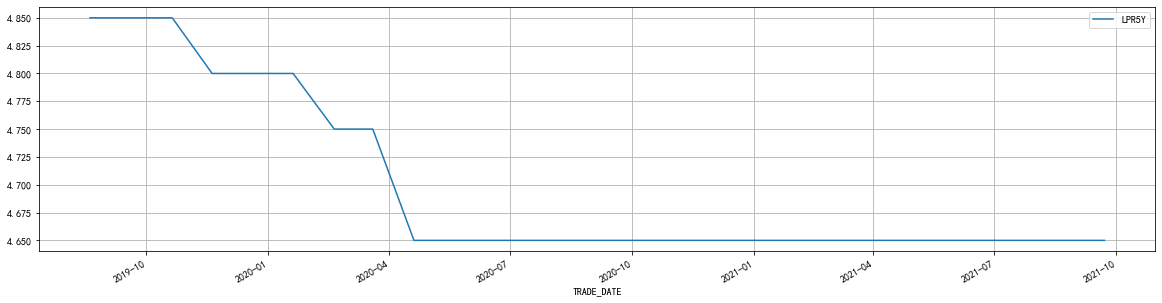

In [26]:
import akshare as ak
df = ak.macro_china_lpr()
df.sort_index(ascending=True,inplace=True)
df = df.loc['2019-01-01':]
df[['LPR5Y']].plot(figsize=(20,5),grid=True)
print(df)

## 社会消费品零售总额 


,当月,同比增长,环比增长,累计,累计-同比增长
月份,,,,,
2021-05-01,35945.0,12.4,8.421561,174319.0,25.7
2021-06-01,37586.0,12.1,4.565308,211904.0,23.0
2021-07-01,34925.0,8.5,-7.079764,246829.0,20.7
2021-08-01,34395.0,2.5,-1.517538,281224.0,18.1
2021-09-01,36833.0,4.4,7.088240,318057.0,16.4


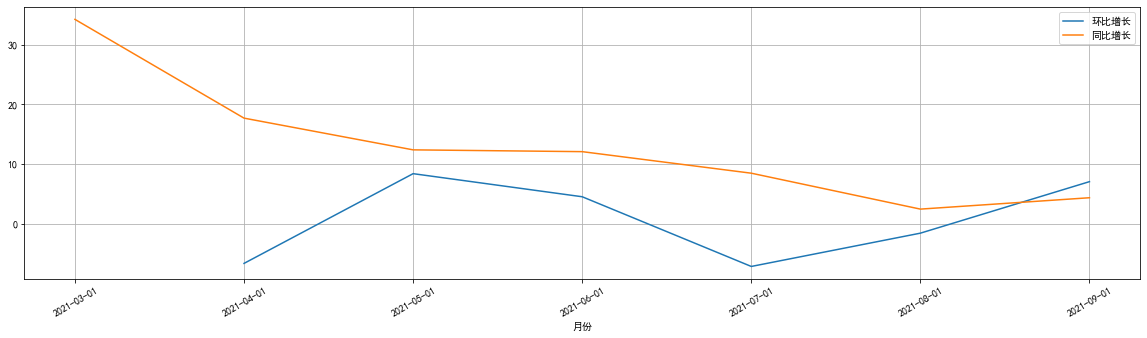

In [7]:
import akshare as ak
df = ak.macro_china_consumer_goods_retail()
df[df.isnull().T.any()]
df.index= df.pop('月份')
df.sort_index(ascending=True,inplace=True)
df  = df.loc['2021-02-01':]
df[['环比增长','同比增长']].plot(kind='line',figsize=(20,5),grid=True,rot=30)
df.tail()

## 社会融资规模统计

,社会融资规模增量,其中-人民币贷款,其中-委托贷款外币贷款(折合人民币),其中-委托贷款,其中-信托贷款,其中-未贴现银行承兑汇票,其中-企业债券,其中-非金融企业境内股票融资,pct
月份,,,,,,,,,
202001,50535,34924,513,-26,432,1403,3967,609,NaN
202002,8737,7202,252,-356,-540,-3961,3894,449,-0.827110
202003,51838,30390,1145,-588,-21,2818,9931,198,4.933158
202004,31027,16239,910,-579,23,577,9237,315,-0.401462
202005,31866,15502,457,-273,-337,836,2879,353,0.027041


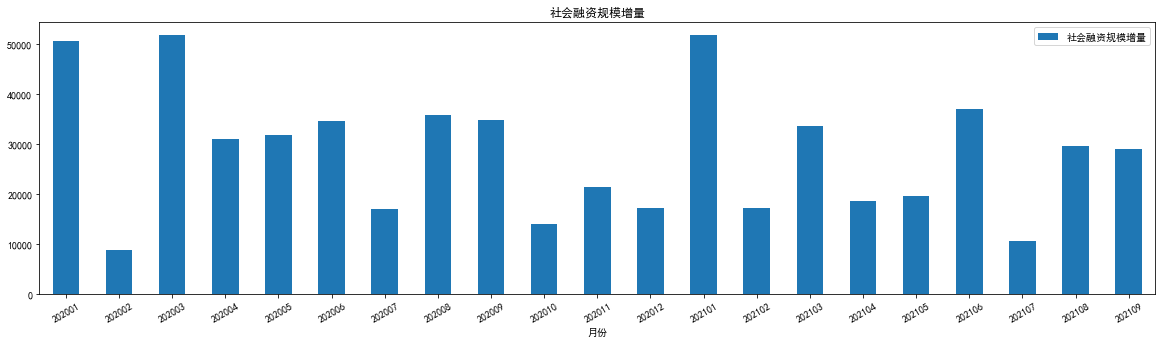

In [2]:
import akshare as ak
df = ak.macro_china_shrzgm()
df.index = df.pop('月份')
# print(df[df.isnull().T.any()])
df.sort_index(inplace=True)
df = df.loc['202001':]
df['pct'] =df['社会融资规模增量'].pct_change()
df[['社会融资规模增量']].plot(figsize=(20,5),kind='bar',title='社会融资规模增量',rot=30)
df.head()

<AxesSubplot:title={'center':'社会融资规模增量'}, xlabel='月份'>

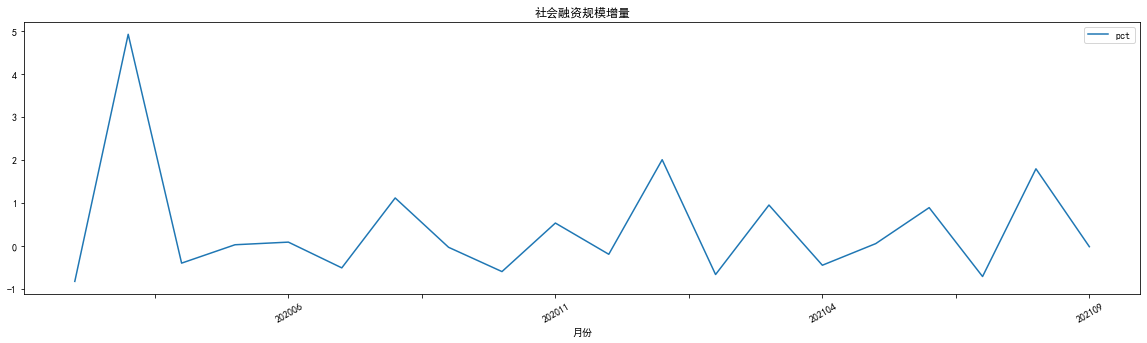

In [3]:
df[['pct']].plot(figsize=(20,5),title='社会融资规模增量',rot=30)

## PMI 

<AxesSubplot:>

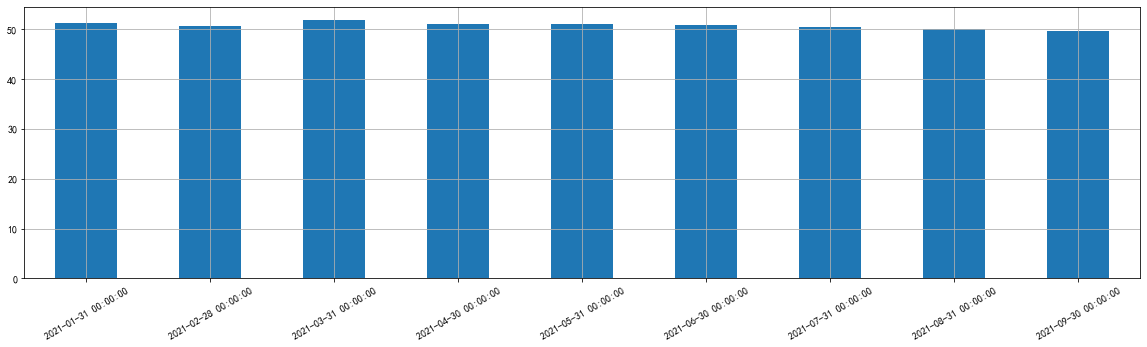

In [10]:
import akshare as ak
df = ak.macro_china_pmi_yearly()
df = df.loc['2021-01-01':]
df.plot(kind='bar',figsize=(20,5),grid=True,rot=30)
# print(macro_china_pmi_yearly_df)
# print(macro_china_pmi_yearly_df.name)

<AxesSubplot:>

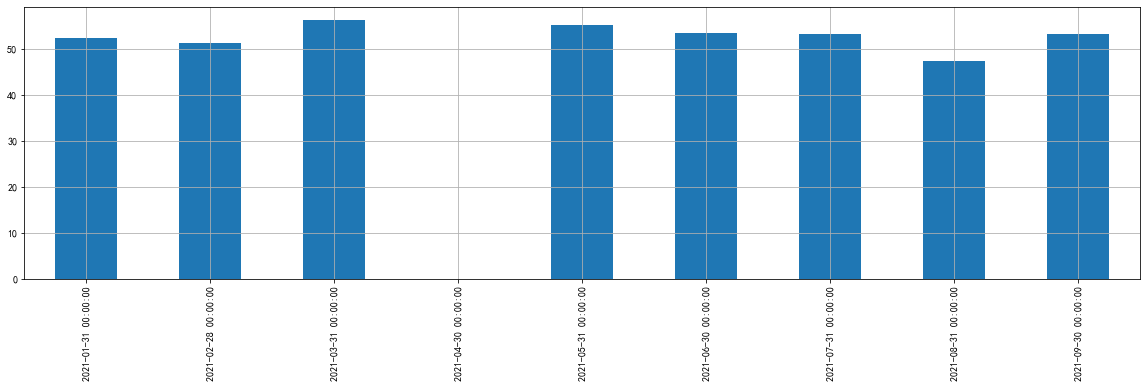

In [11]:
import akshare as ak
df = ak.macro_china_non_man_pmi()
df = df.loc['2021-01-01':]
df.plot(kind='bar',figsize=(20,5),grid=True)

<AxesSubplot:xlabel='月份'>

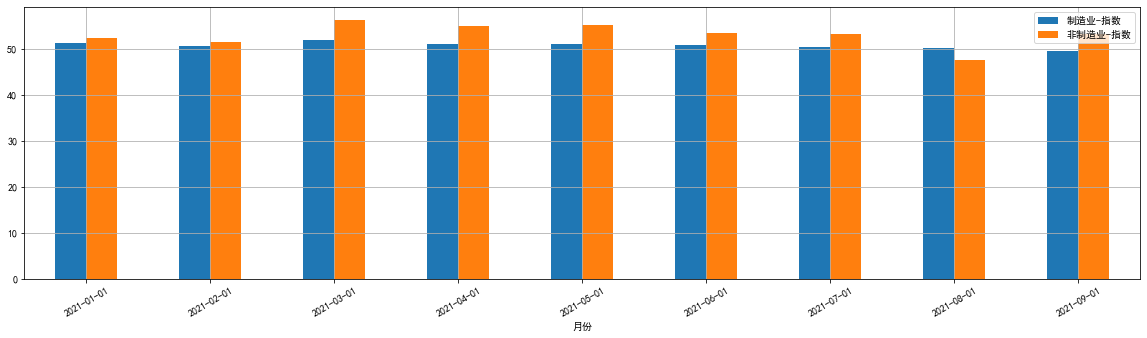

In [12]:
import akshare as ak
macro_china_pmi_df = ak.macro_china_pmi()
macro_china_pmi_df.index = macro_china_pmi_df.pop('月份')
macro_china_pmi_df.sort_index(inplace=True)
macro_china_pmi_df = macro_china_pmi_df.loc['2021-01-01':]
# print(macro_china_pmi_df)
macro_china_pmi_df[['制造业-指数','非制造业-指数']].plot(kind='bar',figsize=(20,5),grid=True,rot=30)

## 固定投资

<AxesSubplot:title={'center':'中国城镇固定资产投资同比增长'}, xlabel='月份'>

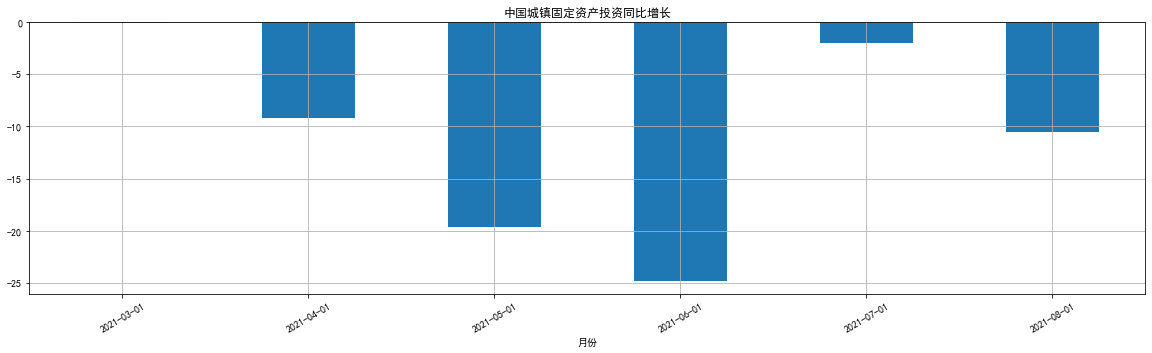

In [32]:
import akshare as ak
df = ak.macro_china_gdzctz()
df.index = df.pop('月份')
df.sort_index(inplace=True)
# print(macro_china_gdzctz_df)
df = df.loc['2021-03-01':]
df['同比增长'] =df['同比增长'].astype('float')
df['环比增长'] =df['环比增长'].astype('float')

df['同比增长'].plot(figsize=(20,5),kind='bar',rot=30,title='中国城镇固定资产投资同比增长',grid=True)

<AxesSubplot:title={'center':'中国城镇固定资产投资环比增长'}, xlabel='月份'>

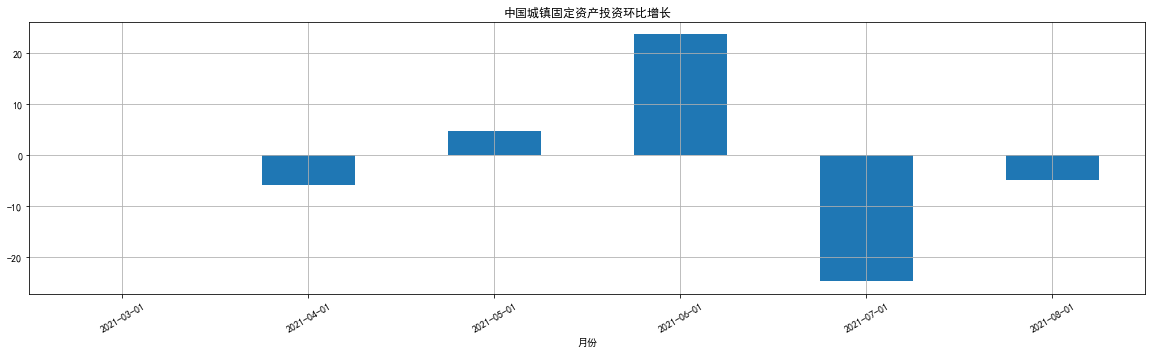

In [33]:
df['环比增长'].plot(figsize=(20,5),rot=30,title='中国城镇固定资产投资环比增长',kind='bar',grid=True)

## 外商直接投资数据

In [3]:
import akshare as ak
df = ak.macro_china_fdi()
df.head()

,月份,当月,当月-同比增长,当月-环比增长,累计,累计-同比增长
0,2020-12-01,14900000,NaN,3.616134,NaN,NaN
1,2020-11-01,14380000,5.611046,21.555368,NaN,NaN
2,2020-10-01,11830000,18.323665,-17.040673,NaN,NaN
3,2020-09-01,14260000,23.784722,18.635607,NaN,NaN
4,2020-08-01,12020000,14.924945,NaN,NaN,NaN


## 以美元计算出口年率

<AxesSubplot:title={'center':'以美元计算出口年率'}, xlabel='index'>

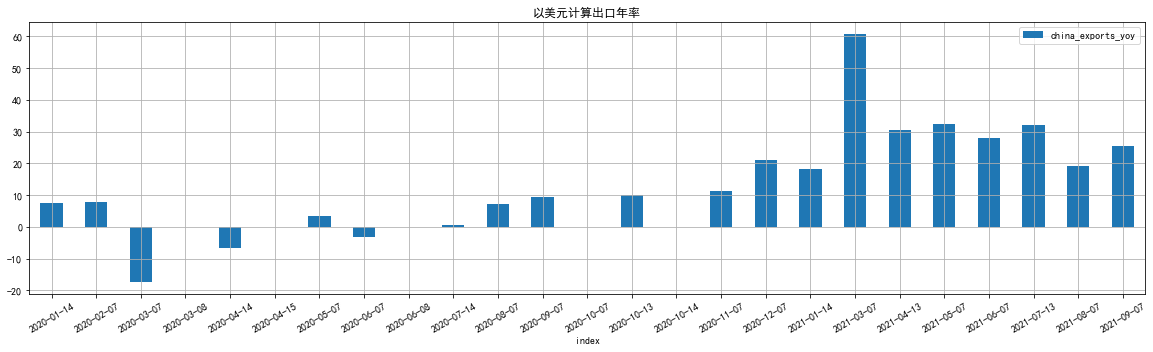

In [34]:
import akshare as ak
import pandas as pd 
from datetime import datetime
df = ak.macro_china_exports_yoy()
df = df.loc['2020-01-01':]
# df.plot(kind='bar',figsize=(20,5),rot=30)
# print(df)

df = pd.DataFrame(df)
df.reset_index(inplace=True)
df['index'] = df['index'].apply(lambda x: datetime.strftime(x,"%Y-%m-%d") )
df.set_index('index',inplace=True)
df.plot(kind='bar',figsize=(20,5),rot=30,title='以美元计算出口年率',grid=True)

## 以美元计算进口年率

<AxesSubplot:title={'center':'以美元计算进口年率'}, xlabel='index'>

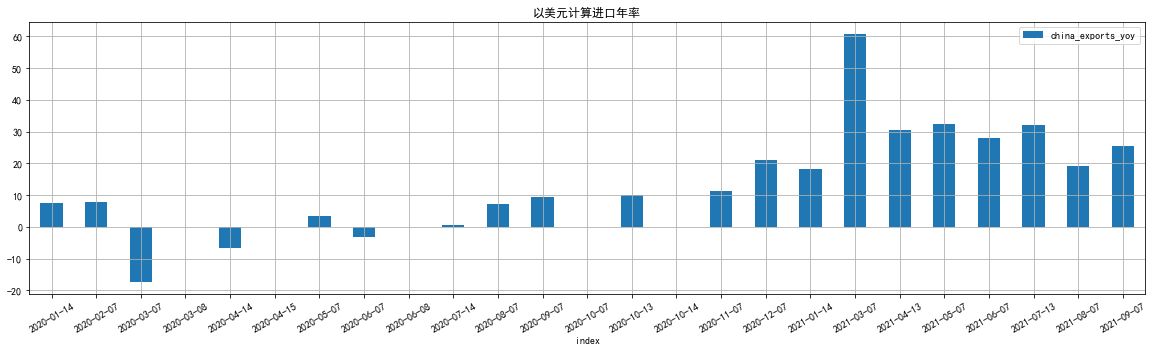

In [35]:
import akshare as ak
df = ak.macro_china_imports_yoy()
# print(df)
df = ak.macro_china_exports_yoy()
df = df.loc['2020-01-01':]
# df.plot(kind='bar',figsize=(20,5),rot=30)
# print(df)

df = pd.DataFrame(df)
df.reset_index(inplace=True)
df['index'] = df['index'].apply(lambda x: datetime.strftime(x,"%Y-%m-%d") )
df.set_index('index',inplace=True)
df.plot(kind='bar',figsize=(20,5),rot=30,title='以美元计算进口年率',grid=True)

## 财政收入

,当月,当月-同比增长,当月-环比增长,累计,累计-同比增长
月份,,,,,
2021-02-01,0,0.000000,0.000000,41805,18.7
2021-03-01,15310,42.392113,0.000000,57115,24.2
2021-04-01,20893,29.376432,36.466362,78008,25.5
2021-05-01,18446,18.707768,-11.712057,96454,24.2
2021-06-01,20662,11.662343,12.013445,117116,21.8


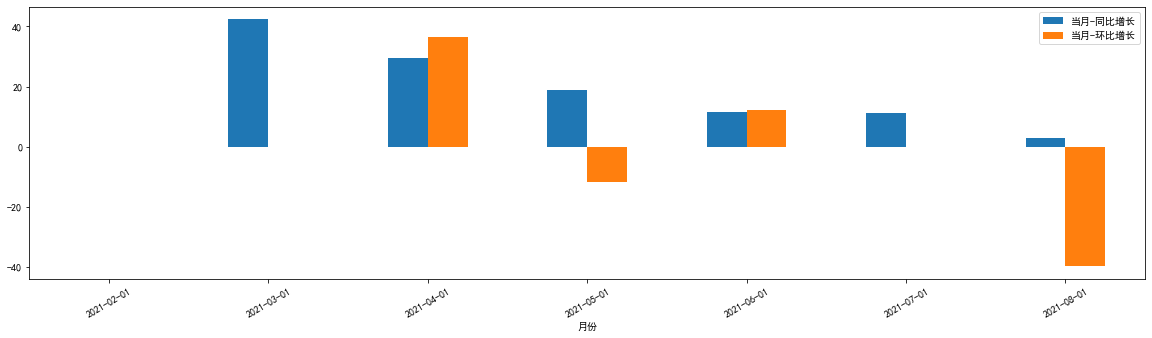

In [36]:
import akshare as ak
df = ak.macro_china_czsr()
# df.head()
df.index = df.pop('月份')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['当月-同比增长'] = df['当月-同比增长'].astype('float')
df['当月-环比增长'] = df['当月-环比增长'].astype('float')
df[['当月-同比增长','当月-环比增长']].plot(figsize=(20,5),rot=30,kind='bar')
df.head()

##  全社会用电情况

<AxesSubplot:xlabel='统计时间'>

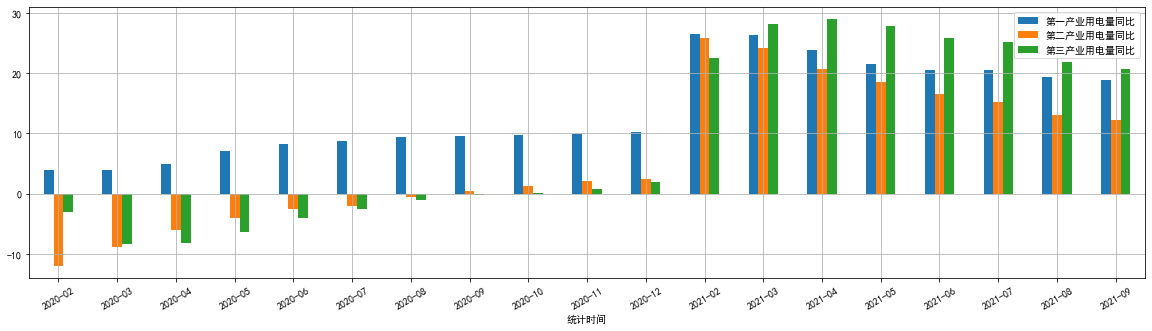

In [8]:
import akshare as ak
from datetime import datetime

df = ak.macro_china_society_electricity()
df['统计时间'] = df['统计时间'].apply(lambda x:  datetime.strptime(x,'%Y.%m'))
df['统计时间'] = df['统计时间'].apply(lambda x:  datetime.strftime(x,'%Y-%m'))

df.index = df.pop('统计时间')
df.sort_index(inplace=True)
df = df.loc['2020-01':]
df['第一产业用电量同比'] = df['第一产业用电量同比'].astype('float')
df['第二产业用电量同比'] = df['第二产业用电量同比'].astype('float')
df['第三产业用电量同比'] = df['第三产业用电量同比'].astype('float')
df[['第一产业用电量同比','第二产业用电量同比','第三产业用电量同比']].plot(grid=True,rot=30,figsize=(20,5),kind='bar')

## 汽柴油历史调价信息

<AxesSubplot:xlabel='日期'>

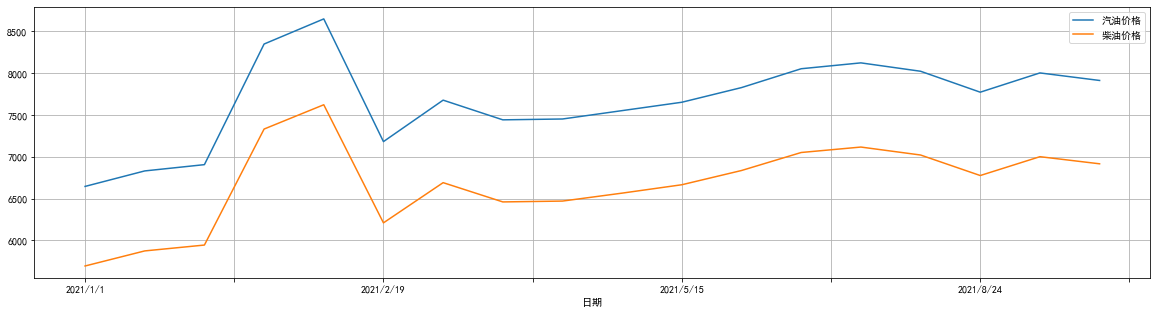

In [22]:
import akshare as ak
df = ak.energy_oil_hist()
df.index = df.pop('日期')
df.sort_index(inplace=True)
df= df.loc['2021/01/01':]
df[['汽油价格','柴油价格']].plot(figsize=(20,5),grid=True)

## 全社会客货运输量

In [39]:
import akshare as ak
from datetime import datetime 
df = ak.macro_china_society_traffic_volume()
df['统计时间'] = df['统计时间'].apply(lambda x:  datetime.strptime(x,'%Y.%m'))
df['统计时间'] = df['统计时间'].apply(lambda x:  datetime.strftime(x,'%Y-%m'))

df.index = df.pop('统计时间')
df.sort_index(inplace=True)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-transport.csv') #存储文件  
df.head()

100%|██████████| 65/65 [00:32<00:00,  2.01it/s]


,统计对象,货运量,货运量同比增长,货物周转量,公里货物周转量同比增长,客运量,客运量同比增长,旅客周转量,公里旅客周转量同比增长,沿海主要港口货物吞吐量,沿海主要港口货物吞吐量同比增长,其中:外贸货物吞吐量,其中:外贸货物吞吐量同比增长,民航总周转量,公里民航总周转
统计时间,,,,,,,,,,,,,,,
1952-12,民航,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1952-12,水运,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1952-12,合计,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1952-12,铁路,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1952-12,公路,None,None,None,None,None,None,None,None,None,None,None,None,None,None


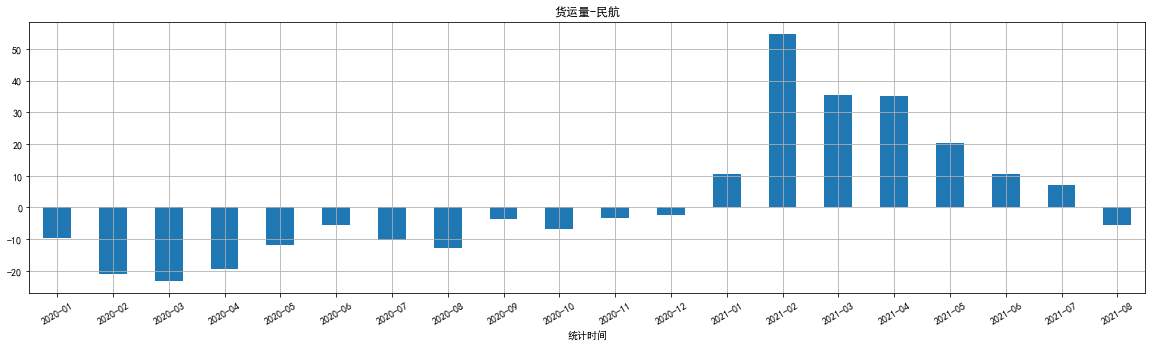

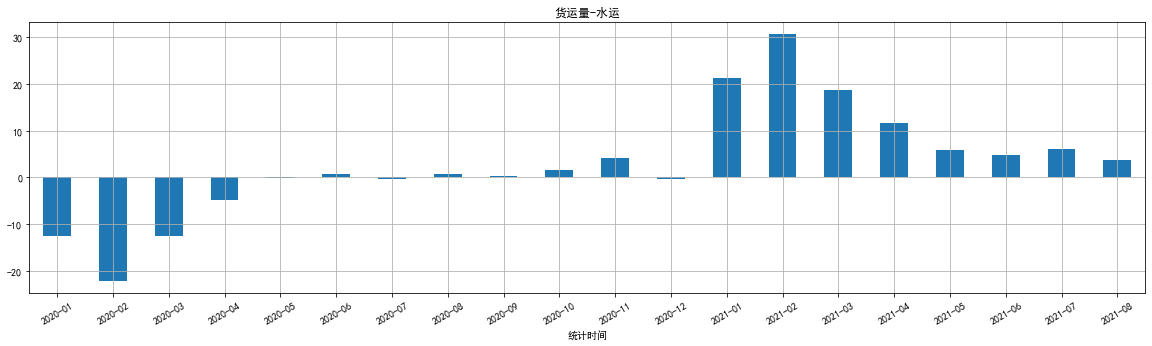

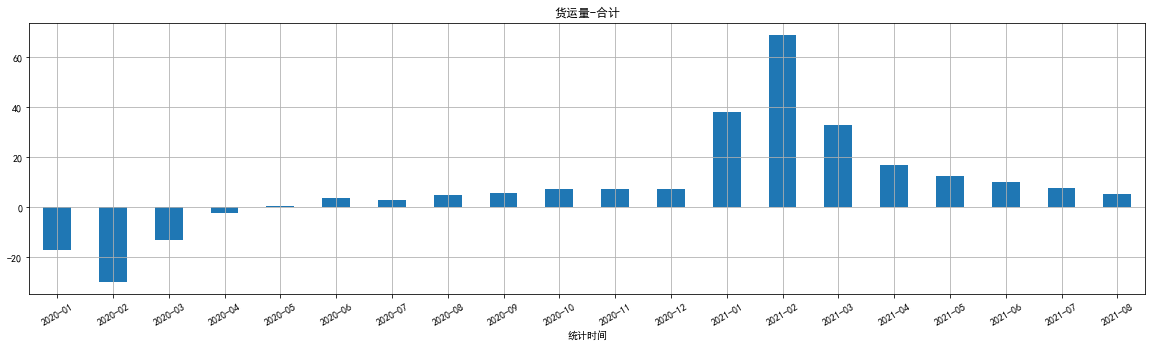

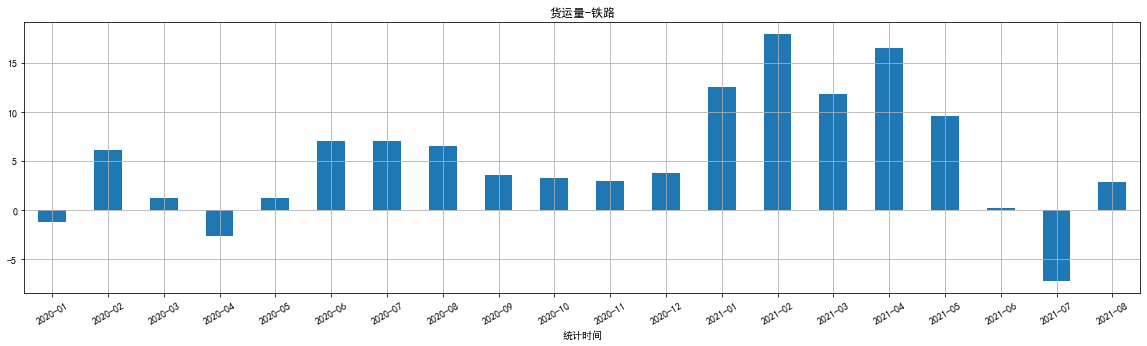

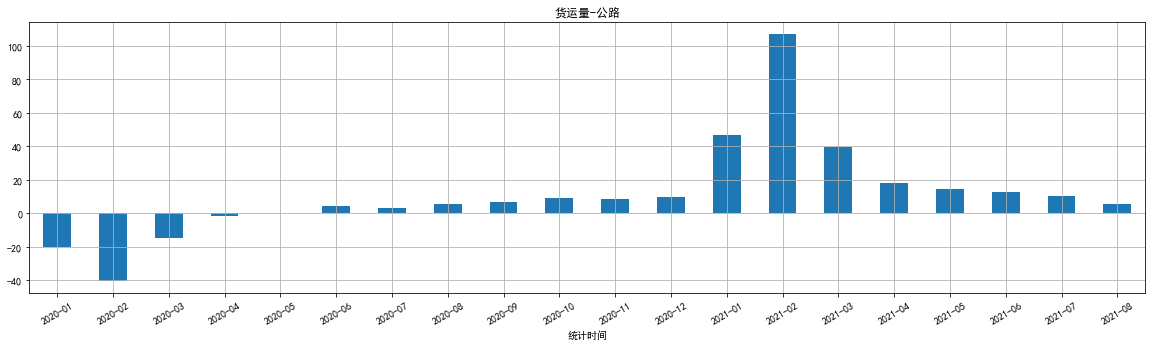

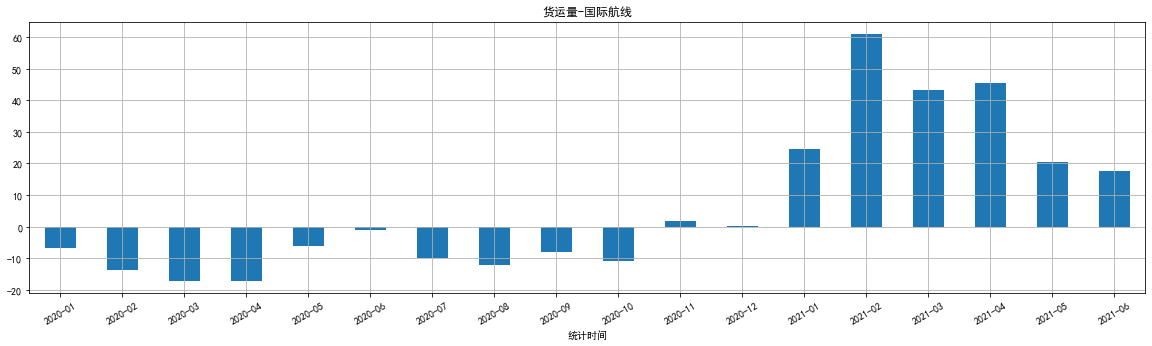

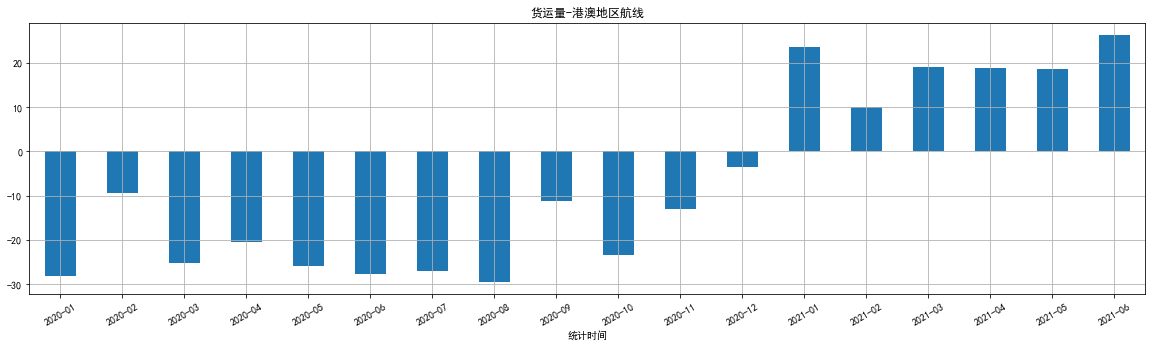

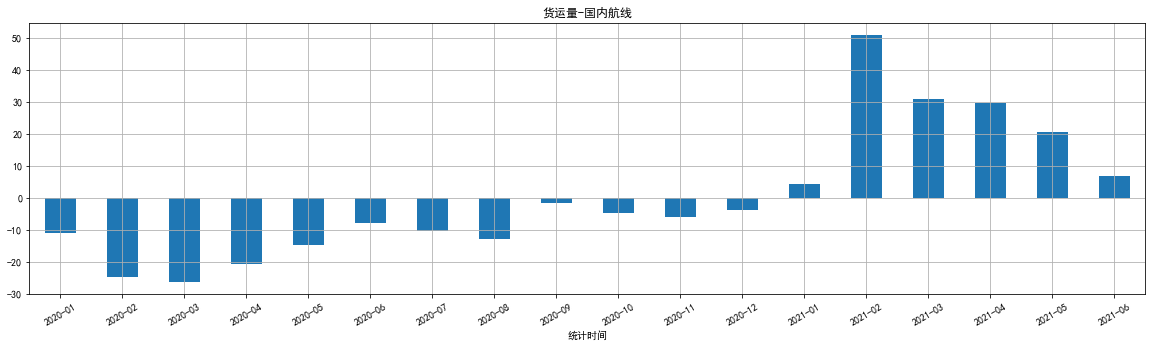

In [40]:
import matplotlib.pyplot as plt
df = pd.read_csv(str + '-transport.csv',index_col='统计时间')
data = df.copy()
cols = data['统计对象'].unique()
df = df.loc['2020-01':]

cols
for i in cols:
    frame = df[df['统计对象'].str.startswith(i)]
    frame['货运量同比增长'].plot(grid=True,figsize=(20,5),title='货运量'+'-'+i,kind='bar',rot=30)
    plt.show()
  

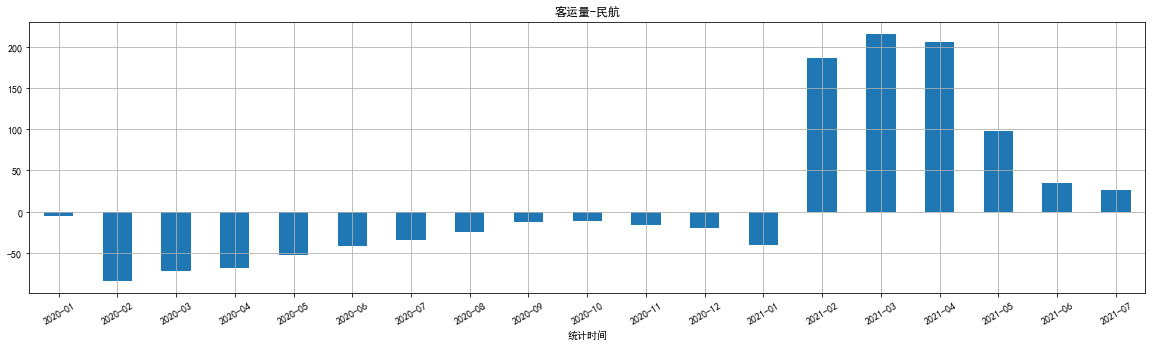

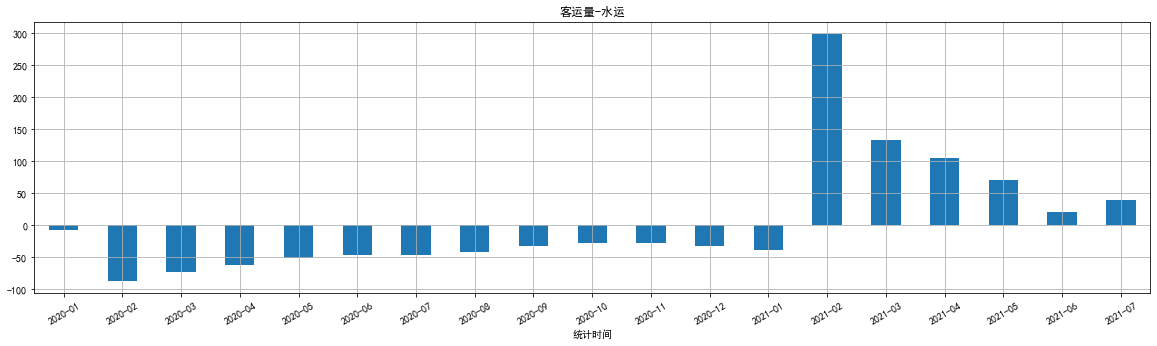

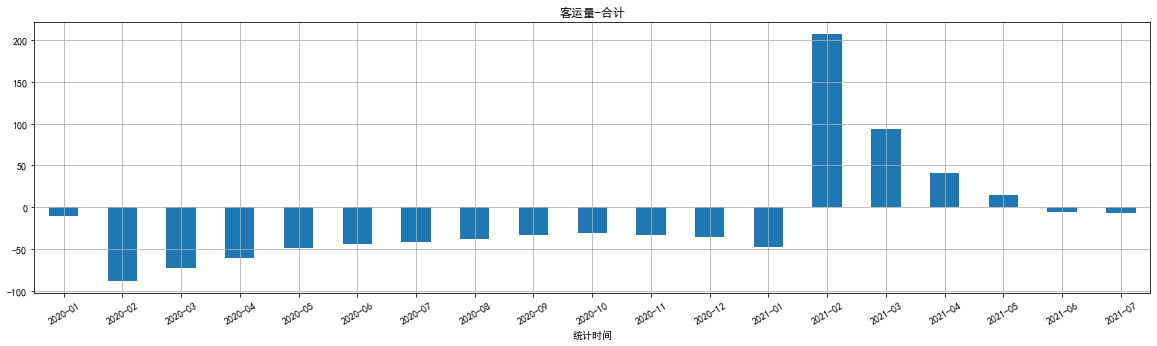

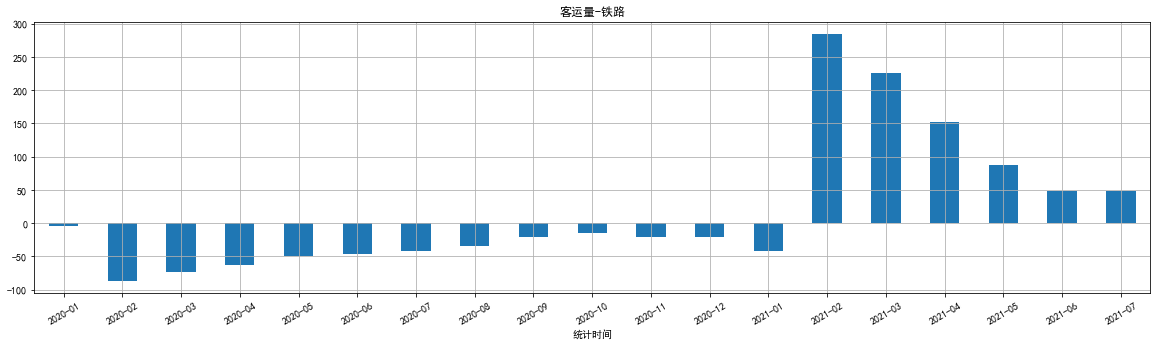

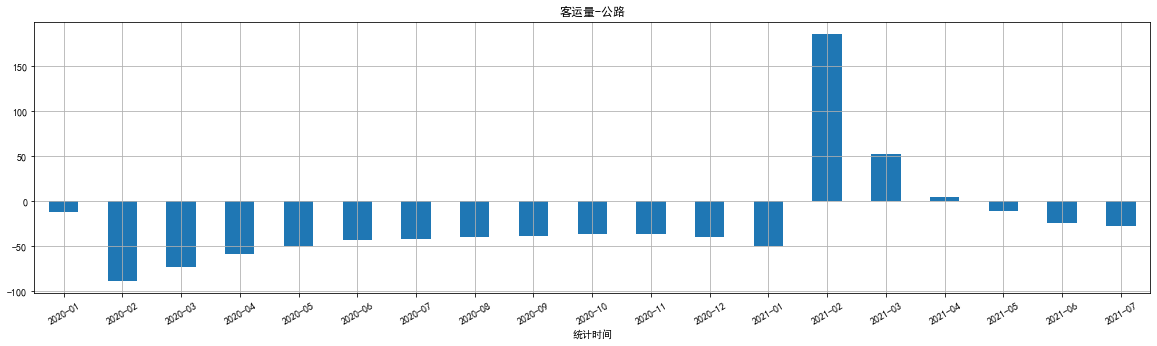

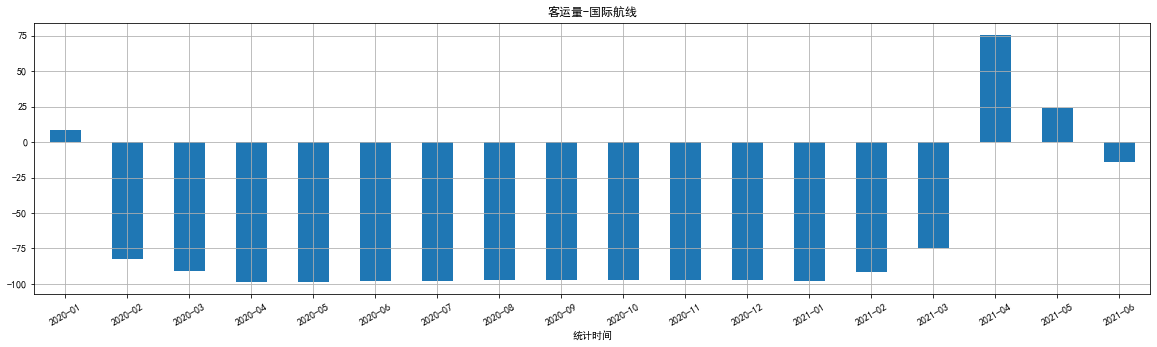

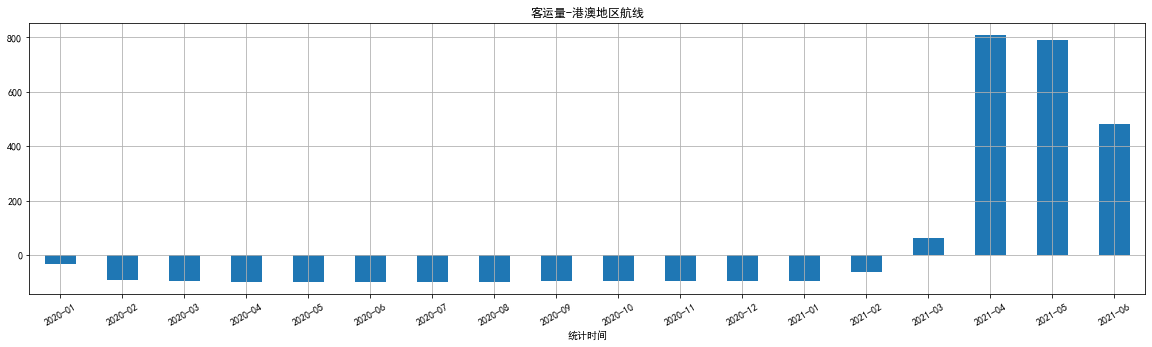

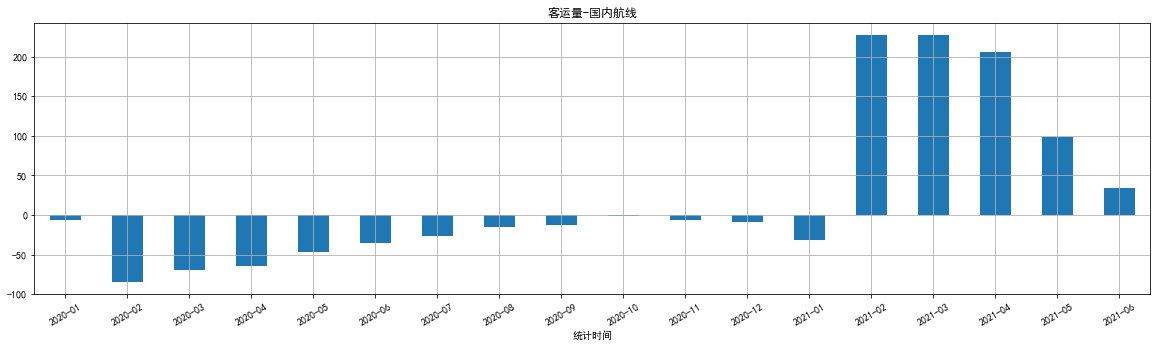

In [258]:
for i in cols:
    frame = df[df['统计对象'].str.startswith(i)]
    frame['客运量同比增长'].plot(grid=True,figsize=(20,5),title='客运量'+'-' +i,kind='bar',rot=30)
    plt.show()  

## 航贸运价指数

<AxesSubplot:title={'center':'波罗的海综合运价指数BDI'}, xlabel='截止日期'>

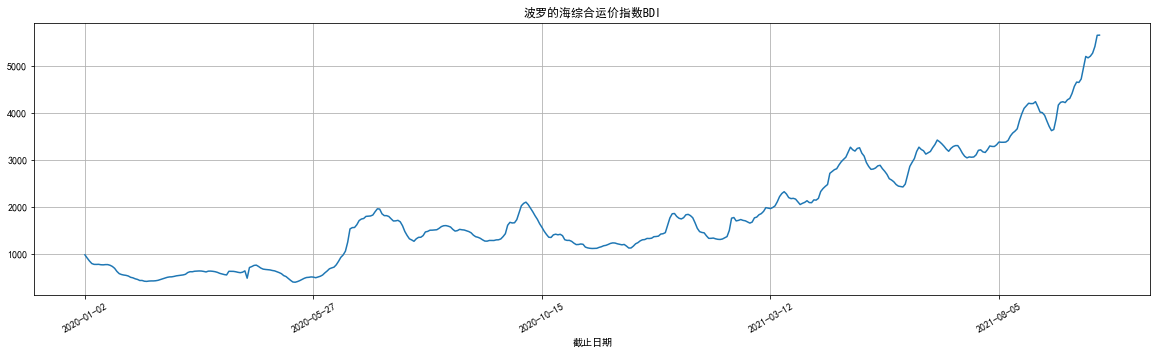

In [4]:
import akshare as ak
df = ak.macro_china_freight_index()
df.index  = df.pop('截止日期')
df.sort_index(inplace=True)
df =df.loc['2020-01':]
df['波罗的海综合运价指数BDI'].plot(figsize=(20,5),grid=True,title='波罗的海综合运价指数BDI',rot=30)

## 新房价指数

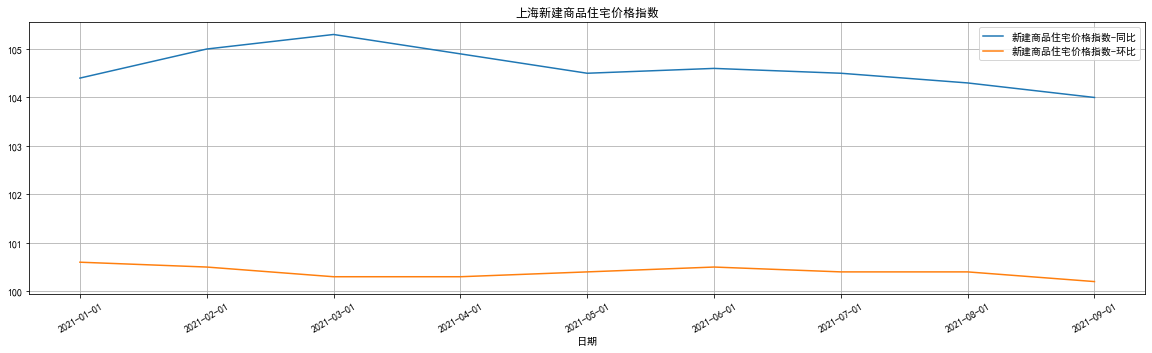

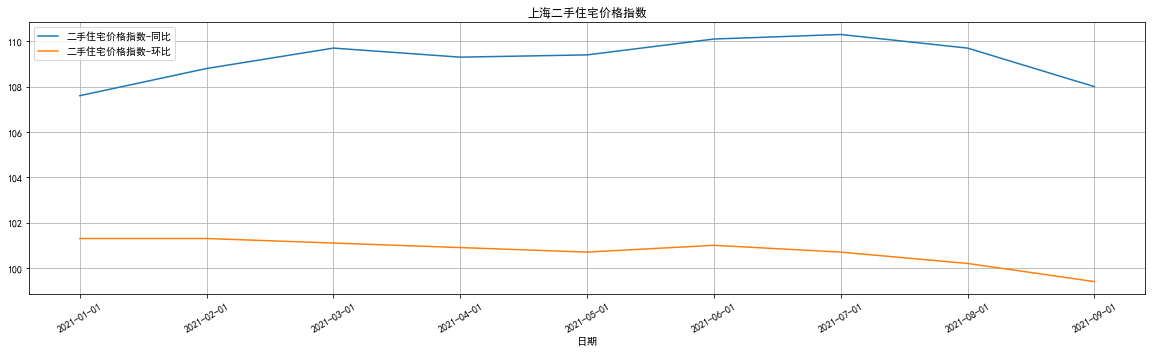

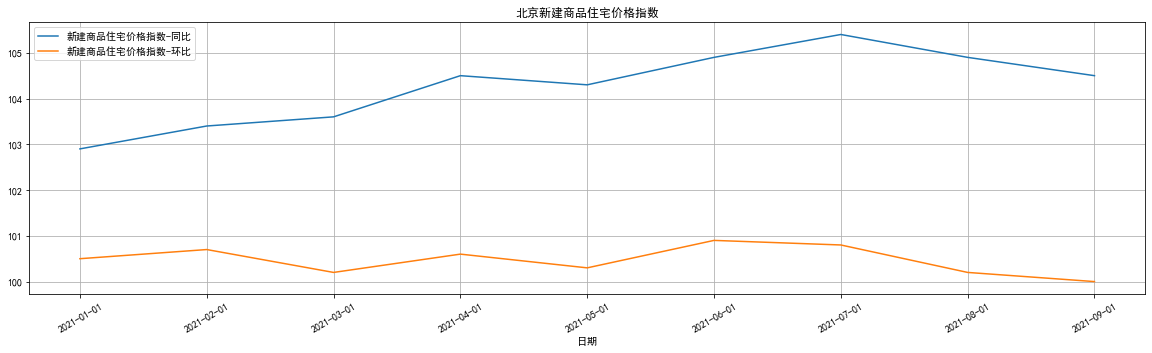

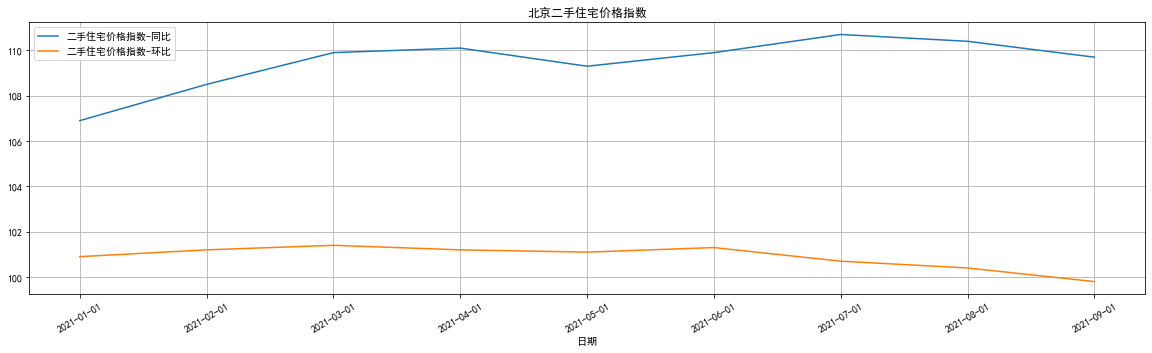

In [23]:
import akshare as ak
from datetime import datetime
import matplotlib.pyplot as plt 
df = ak.macro_china_new_house_price()

df['日期'] = df['日期'].apply(lambda x: datetime.strptime(x,"%Y/%m/%d %H:%M:%S"))
df['日期'] = df['日期'].apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))
df.index = df.pop('日期')
df.sort_index(inplace=True)
df['新建商品住宅价格指数-环比'] = df['新建商品住宅价格指数-环比'].astype('float')
df['新建商品住宅价格指数-同比'] = df['新建商品住宅价格指数-同比'].astype('float')
df['二手住宅价格指数-环比'] = df['二手住宅价格指数-环比'].astype('float')
df['二手住宅价格指数-同比'] = df['二手住宅价格指数-同比'].astype('float')
cols = ['上海','北京']

for i in cols:
    data = df[df['城市'].str.startswith(i)]
    data = data.loc['2021-01-01':]    
    data[['新建商品住宅价格指数-同比','新建商品住宅价格指数-环比']].plot(grid=True,rot=30,figsize=(20,5),title= i+'新建商品住宅价格指数')
    data[['二手住宅价格指数-同比','二手住宅价格指数-环比']].plot(grid=True,rot=30,figsize=(20,5),title= i +'二手住宅价格指数')
    plt.show()

## 全国股票交易统计表

<AxesSubplot:xlabel='数据日期'>

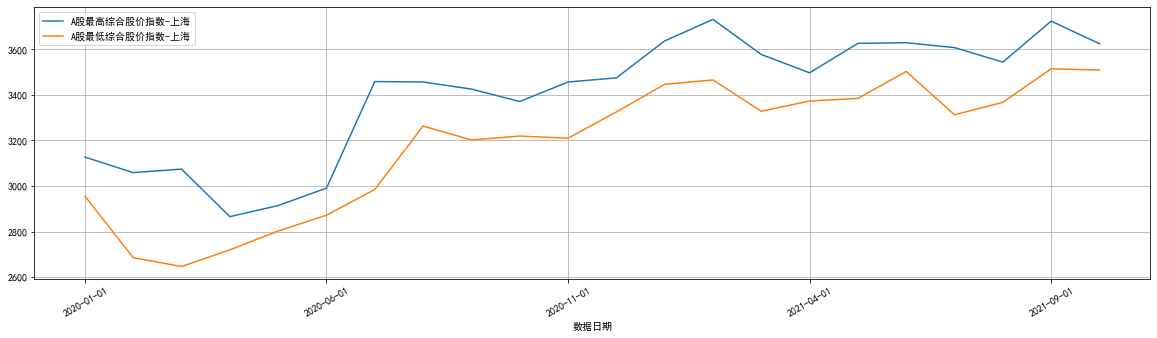

In [24]:
import akshare as ak
df = ak.macro_china_stock_market_cap()
df.index = df.pop('数据日期')
df.sort_index(inplace=True)
df = df.loc['2020-01-01':]
df[['A股最高综合股价指数-上海','A股最低综合股价指数-上海']].plot(figsize=(20,5),grid=True,rot=30)
# print(df)

<AxesSubplot:xlabel='数据日期'>

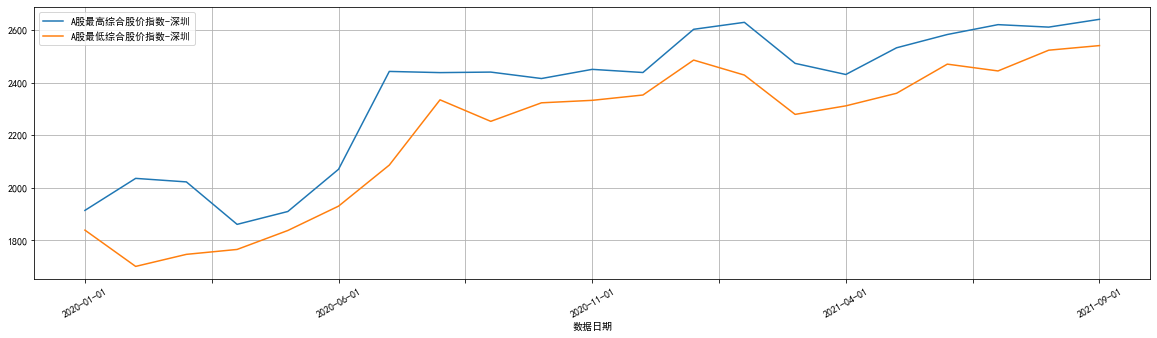

In [45]:
df[['A股最高综合股价指数-深圳','A股最低综合股价指数-深圳']].plot(figsize=(20,5),grid=True,rot=30)

<AxesSubplot:title={'center':'成交金额'}, xlabel='数据日期'>

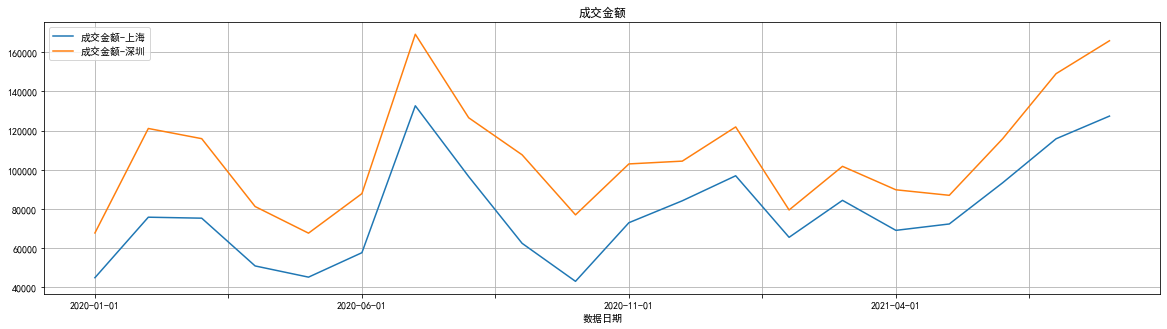

In [46]:
df[['成交金额-上海','成交金额-深圳']].plot(figsize=(20,5),grid=True,title='成交金额')

<AxesSubplot:title={'center':'成交量'}, xlabel='数据日期'>

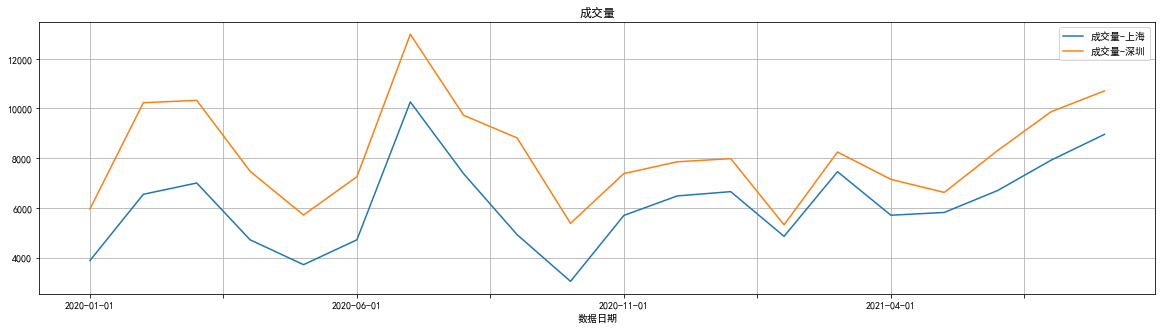

In [47]:
df[['成交量-上海','成交量-深圳']].plot(figsize=(20,5),grid=True,title='成交量')

## 股票指数

In [ ]:
http://vip.stock.finance.sina.com.cn/mkt/#hs_s
http://www.swsindex.com/idx0130.aspx?columnid=8838#
    

             on     1w     2w     1m     3m      6m      9m      1y    3m_avg  \
date                                                                            
20150104  3.640  4.883  5.794  5.629  5.138  4.7537  4.6246  4.7385  3.224382   
20150105  3.421  4.725  5.665  5.364  5.125  4.7478  4.6276  4.7429  3.224382   
20150106  3.032  4.241  4.965  5.102  5.077  4.7482  4.6410  4.7455  3.224382   
20150107  2.881  3.873  4.732  4.953  5.019  4.7501  4.6457  4.7476  3.224382   
20150108  2.830  3.745  4.659  4.803  4.963  4.7480  4.6487  4.7488  3.224382   
...         ...    ...    ...    ...    ...     ...     ...     ...       ...   
20211123  2.178  2.170  2.432  2.353  2.480  2.5860  2.6750  2.7570  3.224382   
20211124  1.788  2.269  2.425  2.353  2.482  2.5890  2.6760  2.7560  3.224382   
20211125  1.823  2.231  2.397  2.353  2.484  2.5920  2.6770  2.7560  3.224382   
20211126  1.712  2.247  2.322  2.353  2.486  2.5930  2.6760  2.7540  3.224382   
20211129  1.860  2.239  2.29

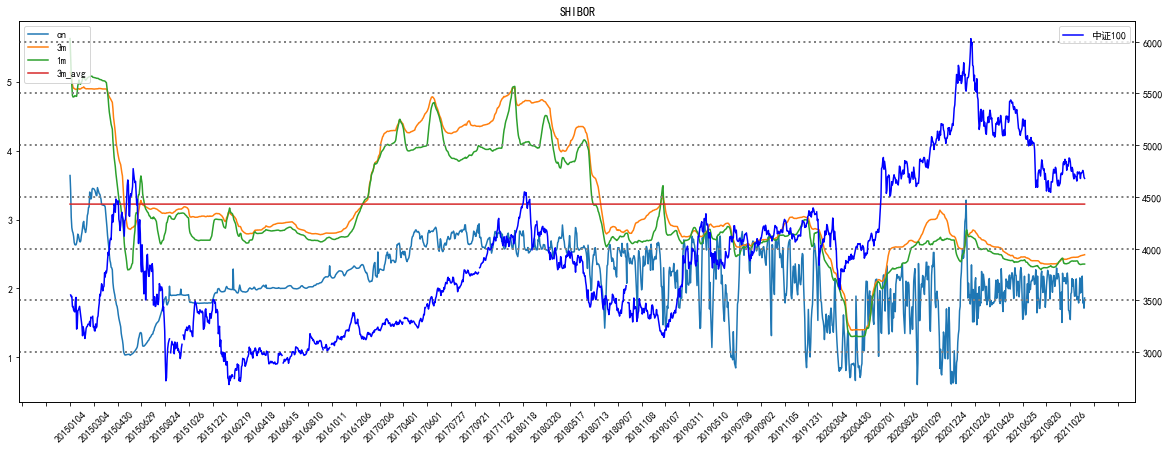

In [8]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
plt.rcParams['axes.unicode_minus']=False


class Shibor(object):
    def __init__(self,start_date,end_date,ts_code):
        self.start_date = start_date
        self.end_date = end_date
        self.ts_code =  ts_code
        self.df = pd.DataFrame()
        self.pro = ts.pro_api()
        self.push_data()
    def push_data(self):
        self.df = self.pro.shibor(start_date= self.start_date, end_date= self.end_date)         
        self.df['date'] = self.df.date.astype('str')
        self.df.index = self.df.pop('date')
        self.df.sort_index(ascending = True,inplace= True)  
        self.df['3m_avg'] = self.df['3m'].mean()
        
        frame = self.pro.index_daily(ts_code= self.ts_code, start_date=self.start_date, end_date=self.end_date)
        frame['trade_date'] = frame['trade_date'].astype('str')
        frame.index = frame.pop('trade_date')
        frame.sort_index(ascending = True,inplace= True) 
        self.df =  pd.merge(self.df,frame['close'],how='left',left_index=True,right_index=True)
        print(self.df)
        
    def plot(self):        
        fig = plt.figure(figsize=(20,7))
        ax = fig.add_subplot(111)   
#         ax.plot(self.df['on'],marker= 'o',label='on')
        ax.plot(self.df['on'],label='on')
        ax.plot(self.df[['3m']],label='3m')
        ax.plot(self.df[['1m']],label='1m')
        ax.plot(self.df[['3m_avg']],label='3m_avg')
        tick_spacing =   40      #通过修改tick_spacing的值可以修改x轴的密度
#         plt.xlim(self.df.index[0],self.df.index[-1])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        plt.xticks(rotation=45)
        plt.legend(loc='upper left')
        plt.title('SHIBOR')
        ax1 = ax.twinx()
        ax1.plot(self.df['close'],label='中证100',color='b')
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        plt.legend(loc='upper right')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)    

        print(self.df.tail())
        
        
if __name__ == "__main__":
    shibor = Shibor('20150101','20211129','000903.SH')
    shibor.plot() 
        

In [2]:
import tushare as ts 
import pandas as pd 

pro = ts.pro_api()

df = pro.index_basic(market='CSI')
df[df['name'].str.contains('中证100')]
# df

,ts_code,name,market,publisher,category,base_date,base_point,list_date
740,931038.CSI,中证100AH,CSI,中证公司,策略指数,20051230,1000.0,20171206
747,931045.CSI,中证100AH(HKD),CSI,中证公司,策略指数,20051230,1000.0,20171206
1346,h00903.CSI,中证100全收益,CSI,中证公司,规模指数,20051230,1000.0,20060529
2302,h21038.CSI,中证100AH(全),CSI,中证公司,策略指数,20051230,1000.0,20171206
2309,h21045.CSI,中证100AH(全)HKD,CSI,中证公司,策略指数,20051230,1000.0,20171206
3363,n00903.CSI,中证100净收益,CSI,中证公司,规模指数,20051230,1000.0,20130208


In [5]:
pro = ts.pro_api()

df = pro.wz_index(start_date='20210101', end_date='20211128')
df

,date,comp_rate,center_rate,micro_rate,cm_rate,sdb_rate,om_rate,aa_rate,m1_rate,m3_rate,m6_rate,m12_rate,long_rate
0,20210104,12.75,14.96,12.79,18.00,8.90,20.62,12.19,19.23,14.47,14.13,7.95,13.00
1,20210105,13.91,15.36,15.52,18.00,8.90,20.62,11.75,19.75,16.55,13.19,8.24,13.08
2,20210106,13.21,15.36,13.72,18.00,8.90,20.62,12.55,19.95,14.33,13.62,8.27,13.03
3,20210107,13.36,15.36,14.08,18.00,8.90,20.62,12.52,20.11,15.06,14.15,8.04,12.85
4,20210108,13.65,14.76,12.75,18.00,11.83,21.38,12.56,19.01,15.27,14.42,11.20,13.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20211111,13.87,10.60,16.40,12.26,11.68,15.38,13.53,15.45,15.44,13.69,11.68,12.35
195,20211112,15.08,12.95,18.11,12.26,12.07,15.68,13.42,15.70,13.17,13.98,15.09,11.50
196,20211115,15.69,13.99,19.40,12.26,12.07,15.68,11.43,16.69,14.23,14.20,12.55,11.53
197,20211116,15.29,13.20,18.62,12.26,12.07,15.68,12.57,16.23,15.31,11.85,12.71,11.43


In [43]:
import pandas as pd 
import numpy as np

df = pd.read_csv('ReqForQuote.csv',encoding='gbk')
# series_pct = df.groupby('指数名称')['涨跌幅(%)'].apply(lambda x: x.mean())
series_pct = df.groupby('指数名称')['涨跌幅(%)'].apply(lambda x: x.median())
series_pct.sort_values(ascending=False)

指数名称
采掘       3.12
化工       3.10
电气设备     2.99
有色金属     2.64
综合       2.58
餐饮旅游     2.51
机械设备     2.48
计算机      2.26
钢铁       2.09
汽车       2.06
传媒       2.05
建筑材料     1.91
公用事业     1.88
轻工制造     1.79
纺织服装     1.76
商业贸易     1.65
医药生物     1.64
电子元器件    1.51
农林牧渔     1.36
通信       1.30
国防军工     1.24
房地产      1.12
建筑装饰     0.99
交通运输     0.89
食品饮料     0.68
家用电器    -0.26
非银金融    -0.55
银行      -1.16
Name: 涨跌幅(%), dtype: float64

In [56]:
pro = ts.pro_api()
df = pro.index_basic(market='SZSE')
df
code = df[df['category']=='策略指数'].ts_code.values
name = df[df['category']=='策略指数'].name.values
dict(zip(name,code))

{'分析师指数': '399354.SZ',
 '大盘低波': '399404.SZ',
 '大盘高贝': '399405.SZ',
 '中盘低波': '399406.SZ',
 '中盘高贝': '399407.SZ',
 '小盘低波': '399408.SZ',
 '小盘高贝': '399409.SZ',
 '红利100': '399411.SZ',
 '专利领先': '399427.SZ',
 '深100EW': '399632.SZ',
 '深300EW': '399633.SZ',
 '中小板EW': '399634.SZ',
 '创业板EW': '399635.SZ',
 '100低波': '399645.SZ',
 '深证绩效': '399655.SZ',
 '100绩效': '399656.SZ',
 '300绩效': '399657.SZ',
 '中小绩效': '399658.SZ',
 '深成指EW': '399659.SZ',
 '中创EW': '399660.SZ',
 '深证低波': '399661.SZ',
 '深证高贝': '399662.SZ',
 '中小低波': '399663.SZ',
 '中小高贝': '399664.SZ',
 '中创低波': '399665.SZ',
 '中创高贝': '399666.SZ',
 '深红利50': '399672.SZ',
 '创业板50': '399673.SZ',
 '深医药EW': '399676.SZ',
 '深互联EW': '399677.SZ',
 '中小专利': '399690.SZ',
 '创业专利': '399691.SZ',
 '创业低波': '399692.SZ',
 '创业高贝': '399694.SZ',
 '深证F60': '399701.SZ',
 '深证F120': '399702.SZ',
 '深证F200': '399703.SZ',
 '基本面50': '399925.SZ',
 '300分层': '399981.SZ',
 '500等权': '399982.SZ',
 '地产等权': '399983.SZ',
 '300等权': '399984.SZ',
 '国企改革全收益': 'h20349.SZ',
 '深证F60R': 's00701.SZ',
 '

In [24]:
df.groupby('指数名称')['涨跌幅(%)'].apply(lambda x: x.describe()).loc[('公用事业',)]

count    16.000000
mean      0.962500
std       2.156959
min      -2.270000
25%      -0.180000
50%       1.065000
75%       2.060000
max       5.160000
Name: 涨跌幅(%), dtype: float64

In [25]:
df.groupby('指数名称')['涨跌幅(%)'].apply(lambda x: x.describe()).loc[('餐饮旅游',)]

count    16.000000
mean      0.276250
std       2.677451
min      -3.860000
25%      -1.805000
50%       1.005000
75%       2.352500
max       3.670000
Name: 涨跌幅(%), dtype: float64

In [26]:
df.groupby('指数名称')['涨跌幅(%)'].apply(lambda x: x.describe()).loc[('建筑装饰',)]

count    16.000000
mean      0.231875
std       1.865980
min      -3.160000
25%      -1.392500
50%       0.725000
75%       1.555000
max       2.860000
Name: 涨跌幅(%), dtype: float64

In [12]:

# series_vol = df.groupby('指数名称')['成交量(亿股)'].apply(lambda x: x.mean())
series_vol = df.groupby('指数名称')['成交量(亿股)'].apply(lambda x: x.median())
series_vol.sort_values(ascending=False)

指数名称
化工       115.145
公用事业     105.395
有色金属      81.060
电气设备      73.520
机械设备      61.670
非银金融      56.765
采掘        54.760
电子元器件     52.910
钢铁        50.745
建筑装饰      47.710
计算机       36.135
医药生物      35.105
汽车        34.790
传媒        34.275
交通运输      33.340
房地产       29.215
银行        25.155
国防军工      20.525
通信        20.410
轻工制造      20.180
建筑材料      15.900
农林牧渔      14.735
商业贸易      12.585
食品饮料      11.335
纺织服装      11.155
家用电器       9.740
综合         5.410
餐饮旅游       2.885
Name: 成交量(亿股), dtype: float64

In [22]:
 df.groupby('指数名称')['成交量(亿股)'].apply(lambda x: x.describe()).loc[('化工',)]
    

count     16.000000
mean     116.255000
std       12.686418
min       92.290000
25%      109.255000
50%      115.145000
75%      121.137500
max      148.050000
Name: 成交量(亿股), dtype: float64

In [23]:
 df.groupby('指数名称')['成交量(亿股)'].apply(lambda x: x.describe()).loc[('公用事业',)]

count     16.000000
mean     109.590000
std       21.699296
min       79.830000
25%       91.152500
50%      105.395000
75%      124.375000
max      156.100000
Name: 成交量(亿股), dtype: float64

In [44]:
df.head()

,指数代码,指数名称,发布日期,开盘指数,最高指数,最低指数,收盘指数,成交量(亿股),成交额(亿元),涨跌幅(%)
0,801010.0,农林牧渔,2021/9/30 0:00,3336.27,3413.88,3336.22,3371.10,14.88,219.15,1.36
1,801020.0,采掘,2021/9/30 0:00,3850.43,3976.45,3830.38,3976.45,41.30,376.98,3.12
2,801030.0,化工,2021/9/30 0:00,4920.57,5047.17,4919.16,5039.58,66.68,"1,043.10",3.10
3,801040.0,钢铁,2021/9/30 0:00,3264.89,3324.94,3255.59,3311.04,26.76,140.05,2.09
4,801050.0,有色金属,2021/9/30 0:00,5574.02,5684.06,5568.87,5669.68,39.89,635.24,2.64


## 板块排行  
symbol	str	Y	symbol="北向资金增持行业板块排行"; choice of {"北向资金增持行业板块排行", "北向资金增持概念板块排行", "北向资金增持地域板块排行"}   
indicator	str	Y	indicator="今日"; choice of {"今日", "3日", "5日", "10日", "1月", "1季", "1年"}  
http://data.eastmoney.com/hsgtcg/hy.html

In [39]:
import akshare as ak
df = ak.stock_em_hsgt_board_rank(symbol="北向资金增持行业板块排行", indicator="5日")
df.head()

,序号,名称,最新涨跌幅,北向资金今日持股-股票只数,北向资金今日持股-市值,北向资金今日持股-占板块比,北向资金今日持股-占北向资金比,北向资金今日增持估计-股票只数,北向资金今日增持估计-市值,北向资金今日增持估计-市值增幅,北向资金今日增持估计-占板块比,北向资金今日增持估计-占北向资金比,今日增持最大股-市值,今日增持最大股-占股本比,今日减持最大股-占股本比,今日减持最大股-市值
0,1,汽车行业,-0.46,43.0,1.508058e+11,0.037073,0.101229,9.0,4.030081e+09,0.027424,0.000991,0.002702,宁德时代,万向钱潮,泉峰汽车,潍柴动力
1,2,电子信息,-0.14,41.0,4.218627e+10,0.037147,0.028318,24.0,3.081448e+09,0.081164,0.002713,0.002066,东方财富,联创电子,捷顺科技,世纪华通
2,3,贵金属,0.53,10.0,1.744350e+10,0.030554,0.011709,6.0,2.077905e+09,0.145646,0.003640,0.001393,紫金矿业,湖南黄金,恒邦股份,中金黄金
3,4,医疗行业,-1.48,41.0,1.311756e+11,0.059024,0.088053,16.0,1.408739e+09,0.010887,0.000634,0.000945,迈瑞医疗,东富龙,通策医疗,通策医疗
4,5,软件服务,-0.48,80.0,7.102202e+10,0.039327,0.047674,48.0,1.182436e+09,0.016398,0.000655,0.000793,恒生电子,恒华科技,吉比特,科大讯飞


## 大宗商品-品种指数数据   
目标地址: http://www.96369.net/indices/65  
名称	类型	必选	描述  
symbol	str	Y	symbol=161; 参考如下 指数代码一览表  
start_date	str	Y	start_date="2000-10-01";  
end_date	str	Y	end_date="2020-04-17";  
plot	Bool	Y	plot=True; 是否画图  
指数代码一览表  
指数	代码  
钢材指数	65  
铁矿指数	61  
焦炭指数	64  
煤炭指数	1002  
水泥指数	1003  
FTZ指数	1100  
钢铁行业PMI指数	118  


## 钢材指数

In [48]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=65, start_date="2000-10-01", end_date="2021-09-14", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-steel.csv') #存储文件 

# print(futures_xgx_index_df)

1


,值,涨跌额,涨跌幅
日期,,,
2021-09-08,5570.0,-20.0,-0.36%
2021-09-09,5590.0,20.0,0.36%
2021-09-10,5720.0,130.0,2.33%
2021-09-13,5800.0,80.0,1.40%
2021-09-14,5800.0,0.0,0.00%


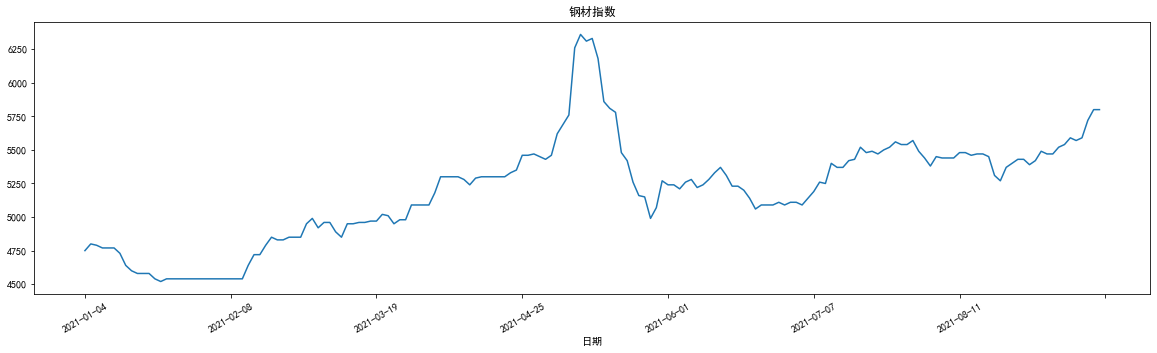

In [49]:
df= pd.read_csv(str + '-steel.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title='钢材指数')
df.tail()

## 铁矿指数

In [50]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=61, start_date="2000-10-01", end_date="2021-09-14", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-iron.csv') #存储文件 


3


,值,涨跌额,涨跌幅
日期,,,
2021-09-08,1300.0,0.0,0.00%
2021-09-09,1310.0,10.0,0.77%
2021-09-10,1310.0,0.0,0.00%
2021-09-13,1310.0,0.0,0.00%
2021-09-14,1300.0,-10.0,-0.76%


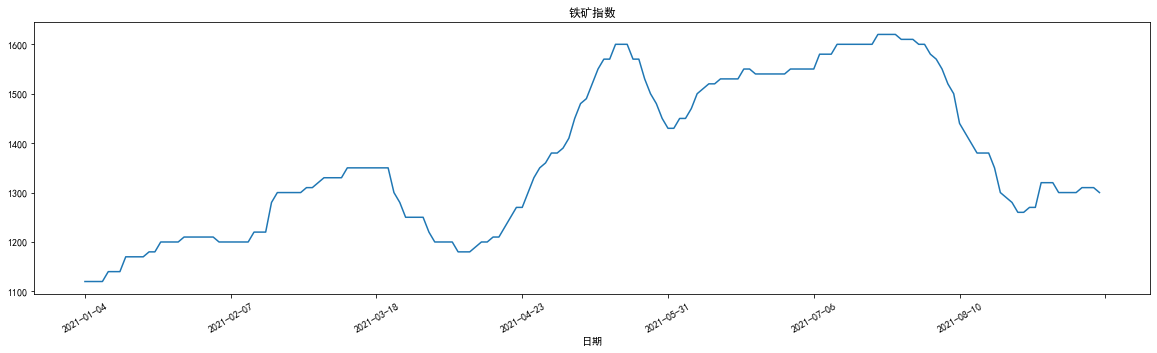

In [51]:
df= pd.read_csv(str + '-iron.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title='铁矿指数')
df.tail()

## 焦炭指数

In [52]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=64, start_date="2000-10-01", end_date="2021-09-14", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-jiaotan.csv') #存储文件 


8


,值,涨跌额,涨跌幅
日期,,,
2021-09-08,3600.0,0.0,0.00%
2021-09-09,3600.0,0.0,0.00%
2021-09-10,3800.0,200.0,5.56%
2021-09-13,3800.0,0.0,0.00%
2021-09-14,3800.0,0.0,0.00%


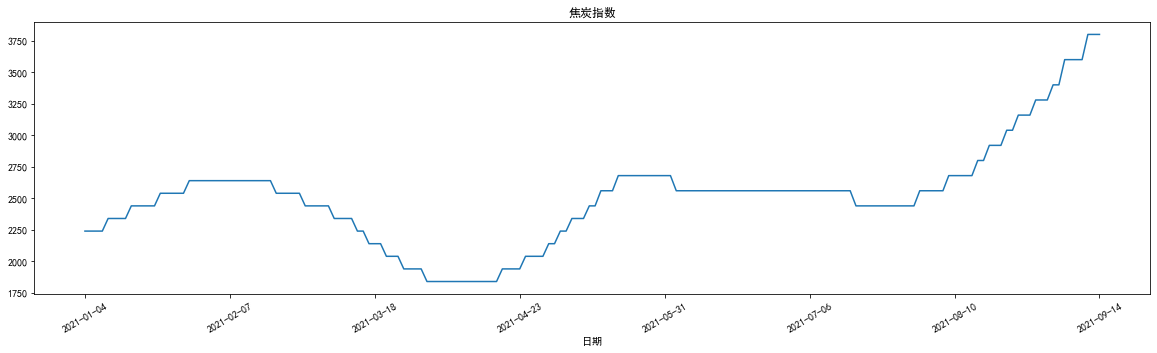

In [53]:
df= pd.read_csv(str + '-jiaotan.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title ='焦炭指数')
df.tail()

## 煤炭指数

In [33]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=1002, start_date="2000-10-01", end_date="2021-10-28", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-meitan.csv') #存储文件 


11


,值,涨跌额,涨跌幅
日期,,,
2021-10-22,2230.0,-90.0,-3.88%
2021-10-25,2100.0,-130.0,-5.83%
2021-10-26,2000.0,-100.0,-4.76%
2021-10-27,1900.0,-100.0,-5.00%
2021-10-28,1650.0,-250.0,-13.16%


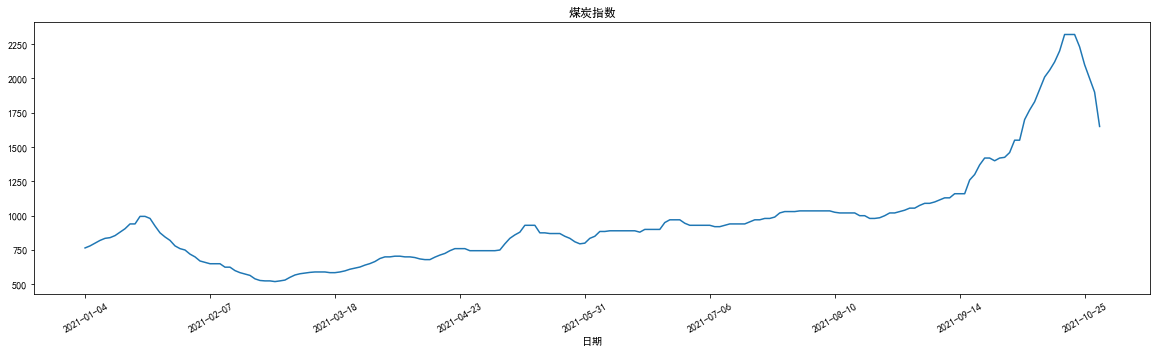

In [34]:
df= pd.read_csv(str + '-meitan.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title ='煤炭指数')
df.tail()

## 水泥指数

In [35]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=1003, start_date="2000-10-01", end_date="2021-10-28", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-shuini.csv') #存储文件 

2


,值,涨跌额,涨跌幅
日期,,,
2021-10-22,669.0,0.0,0.00%
2021-10-25,680.0,11.0,1.64%
2021-10-26,684.0,4.0,0.59%
2021-10-27,684.0,0.0,0.00%
2021-10-28,684.0,0.0,0.00%


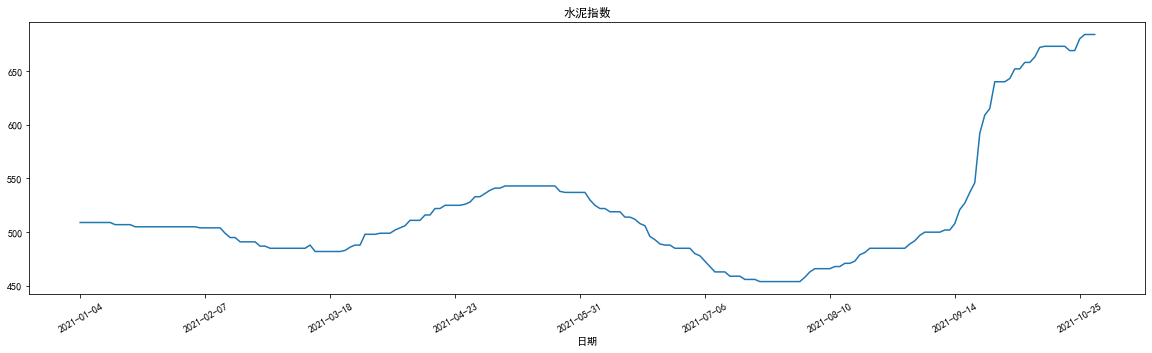

In [36]:
df= pd.read_csv(str + '-shuini.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title ='水泥指数')
df.tail()

## 原材料库存指数

In [37]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=123, start_date="2000-10-01", end_date="2021-10-28", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-yuancailiao.csv') #存储文件 

10


,值,涨跌额,涨跌幅
日期,,,
2021-05-31,40.0,4.5,12.68%
2021-06-30,37.5,-2.5,-6.25%
2021-07-31,35.8,-1.7,-4.53%
2021-08-31,35.6,-0.2,-0.56%
2021-09-30,39.1,3.5,9.83%


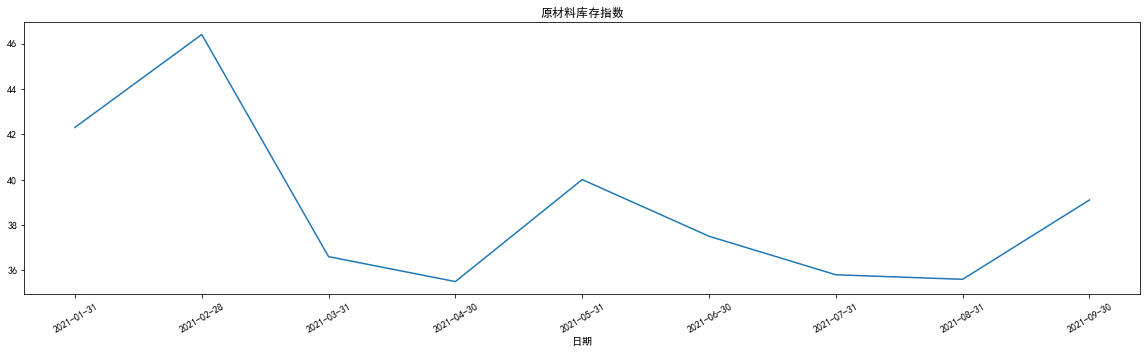

In [38]:
df= pd.read_csv(str + '-yuancailiao.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title ='原材料库存指数')
df.tail()

## 产成品库存指数

In [39]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=122, start_date="2000-10-01", end_date="2021-10-28", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-inv.csv') #存储文件 

9


,值,涨跌额,涨跌幅
日期,,,
2021-05-31,43.4,9.0,26.16%
2021-06-30,47.1,3.7,8.53%
2021-07-31,31.6,-15.5,-32.91%
2021-08-31,33.5,1.9,6.01%
2021-09-30,34.9,1.4,4.18%


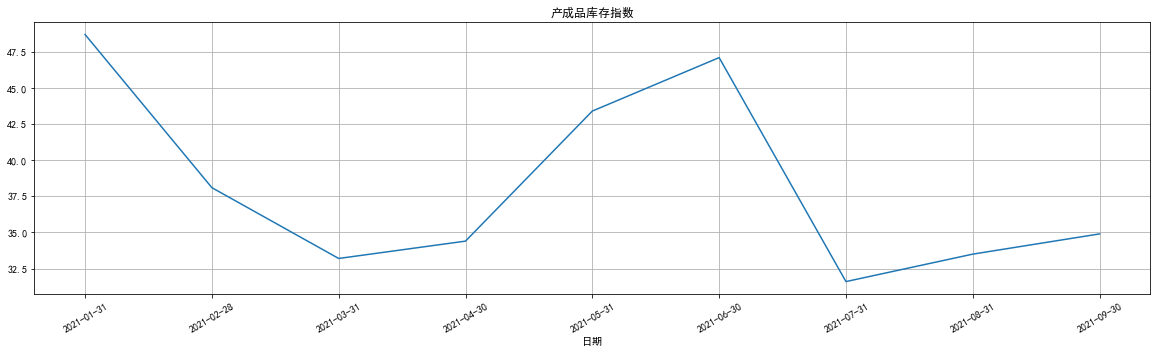

In [40]:
df= pd.read_csv(str + '-inv.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title ='产成品库存指数',grid=True)
df.tail()

## 新订单指数

In [27]:
import akshare as ak
from datetime import datetime
df = ak.futures_xgx_index(symbol=120, start_date="2000-10-01", end_date="2021-10-28", plot=False)
str = datetime.now().strftime("%Y-%m-%d")  #取当前日期
df.to_csv(str + '-newbook.csv') #存储文件

5


,值,涨跌额,涨跌幅
日期,,,
2021-05-31,39.4,-5.0,-11.26%
2021-06-30,34.8,-4.6,-11.68%
2021-07-31,36.8,2.0,5.75%
2021-08-31,31.6,-5.2,-14.13%
2021-09-30,39.0,7.4,23.42%


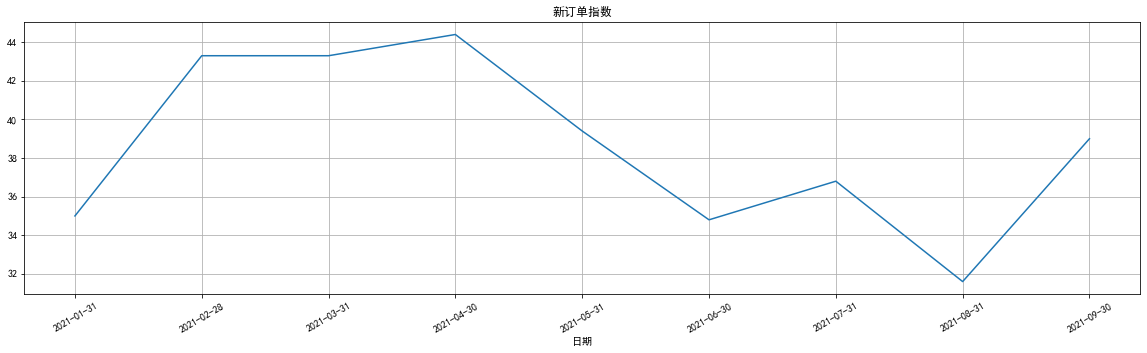

In [28]:
df= pd.read_csv(str + '-newbook.csv',index_col='日期')
df.sort_index(inplace=True)
df = df.loc['2021-01-01':]
df['值'].plot(figsize=(20,5),rot=30,title ='新订单指数',grid=True)
df.tail()

## 期货价格指数

In [ ]:
http://www.nanhua.net/nhzc/varietytrend.html

## 有利于投资股票的信息
经济疲软  （工业生产指数、社会消费品零售总额、汽车销售量）  
货币供应增长速度加快  
短期利率下跌或者维持在一个稳定的水平  
大宗商品价格下跌或者维持在一个稳定的水平  
通货膨胀维持在一个稳定的水平 
公用事业类股票走强    
市场成交量放大  
市场波动幅度减弱或者降低  

## 不利于投资股票的信息  
经济强劲  
货币供给下降 
大宗商品价格持续上涨2到3个月  
通货膨胀上涨  
公用事业类股票表现疲软 
市场成交量下降或者处于很低的水平  
市场的波动幅度加剧  

## 领先指标
平均每周首次申领失业救济金人数  
股票价格，大盘指数  
M2货币供应量 
银行隔夜拆借利率  
新开工项目、产品销售率、房地产开发投资

## 同步指标  
工业生产指数   https://www.ceicdata.com/zh-hans/indicator/china/industrial-production-index-growth  
社会消费品零售总额  
汽车销售量  

## 落后指标  
3个月SHIBOR利率   
社会融资规模  
PPI     
CPI 、财政支出、工业企业产成品资金 



# 个股  

## 成交量加权平均   
https://cn.tradingview.com/support/solutions/43000502018/


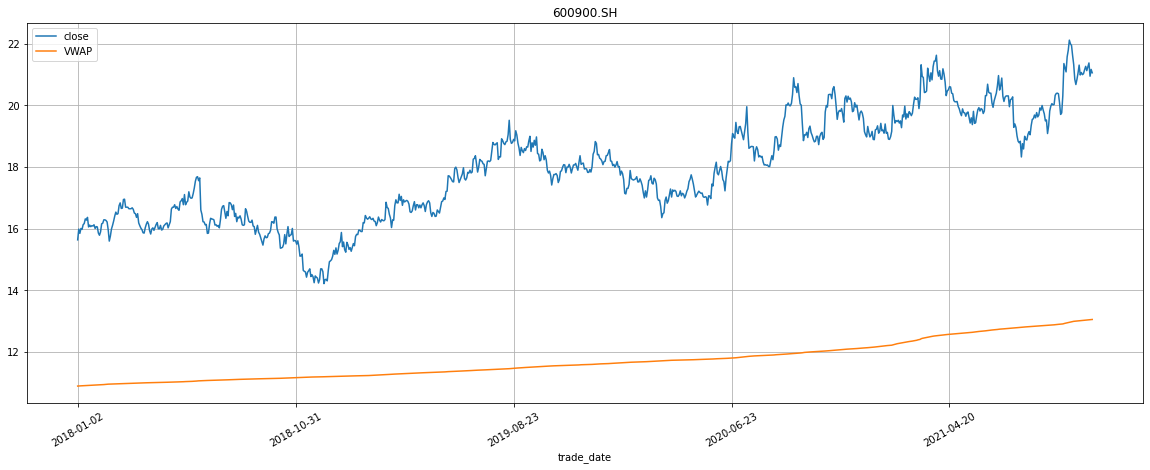

In [3]:
from  datetime import datetime,date
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

class Security_eva(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['Typical_Price'] = (df.high + df.low + df.close) / 3
        self.df['VP'] = df['Typical_Price'] * df['vol']
        self.df['Total_VP'] = df['VP'].cumsum()
        self.df['Total_V'] = df['vol'].cumsum()
        self.df['VWAP'] = df['Total_VP'] / df['Total_V']
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_kline.csv') #存储文件 
    def plot(self,data):
        data[['close','VWAP']].plot(figsize = (20,7),grid=True,title= data.iloc[0,0],rot=30)
        
if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.daily(ts_code='600900.SH', start_date='20090101', end_date='20211104')
    stock = Security_eva(df)
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_kline.csv',index_col='trade_date') 
    data = data.loc['2018-01-01':'2021-11-04']  #选取时间段
    stock.plot(data)


## PE

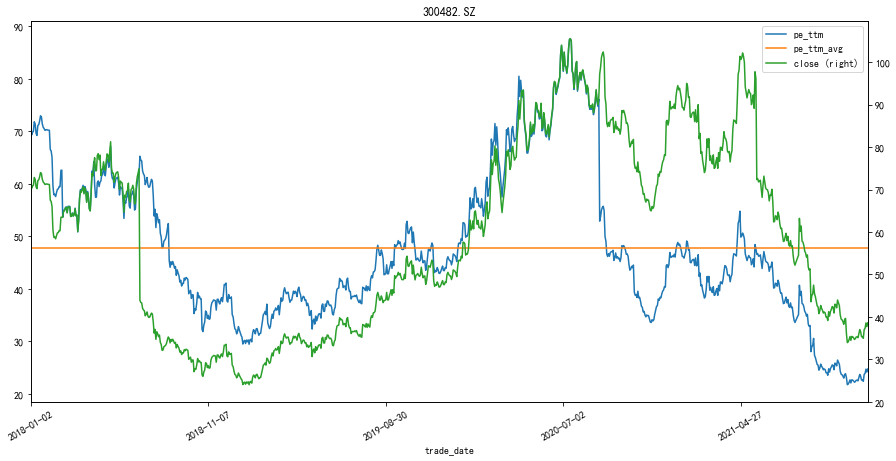

              ts_code  close   pe_ttm  pe_ttm_avg
trade_date                                       
2021-02-22  300482.SZ  78.51  40.5516    47.81058
2021-02-23  300482.SZ  78.92  40.7633    47.81058
2021-02-24  300482.SZ  76.83  39.6838    47.81058
2021-02-25  300482.SZ  75.51  39.0020    47.81058
2021-02-26  300482.SZ  74.00  38.2221    47.81058
...               ...    ...      ...         ...
2021-11-23  300482.SZ  37.04  23.6980    47.81058
2021-11-24  300482.SZ  37.31  23.8707    47.81058
2021-11-25  300482.SZ  38.58  24.6832    47.81058
2021-11-26  300482.SZ  37.71  24.1266    47.81058
2021-11-29  300482.SZ  38.60  24.6960    47.81058

[155 rows x 4 columns]


In [1]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')
%matplotlib inline
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

class Security_PE(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['pe_ttm_avg'] = self.df.pe_ttm.mean()
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_PE.csv') #存储文件 
        
    def plot(self,data):
        data['pe_ttm_avg'] = data['pe_ttm'].mean()
        data[['pe_ttm','pe_ttm_avg','close']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30,secondary_y=['close'])        
        plt.show()
    def cal(self,data):
        
        data = data[data.index>'2021-01-01']
        print(data[data['close'] < 80])        
        
        
if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.query('daily_basic', ts_code='300482.SZ',start_date='20090101', end_date='20211129',fields='ts_code,trade_date,pe_ttm,close')   

    stock = Security_PE(df)
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_PE.csv',index_col='trade_date')
    data = data.loc['2018-01-01':'2021-11-29']  #选取时间段
    stock.plot(data) 
    stock.cal(data)
    
        

## PB

              ts_code  close      pb    pb_avg
trade_date                                    
2021-08-20  300482.SZ  43.56  7.0660  8.984939
2021-08-27  300482.SZ  44.77  6.3011  8.984939
2021-08-30  300482.SZ  43.75  6.1576  8.984939
2021-08-31  300482.SZ  42.61  5.9971  8.984939
2021-09-01  300482.SZ  42.39  5.9662  8.984939
...               ...    ...     ...       ...
2021-11-23  300482.SZ  37.04  5.1416  8.984939
2021-11-24  300482.SZ  37.31  5.1791  8.984939
2021-11-25  300482.SZ  38.58  5.3554  8.984939
2021-11-26  300482.SZ  37.71  5.2346  8.984939
2021-11-29  300482.SZ  38.60  5.3581  8.984939

[61 rows x 4 columns]


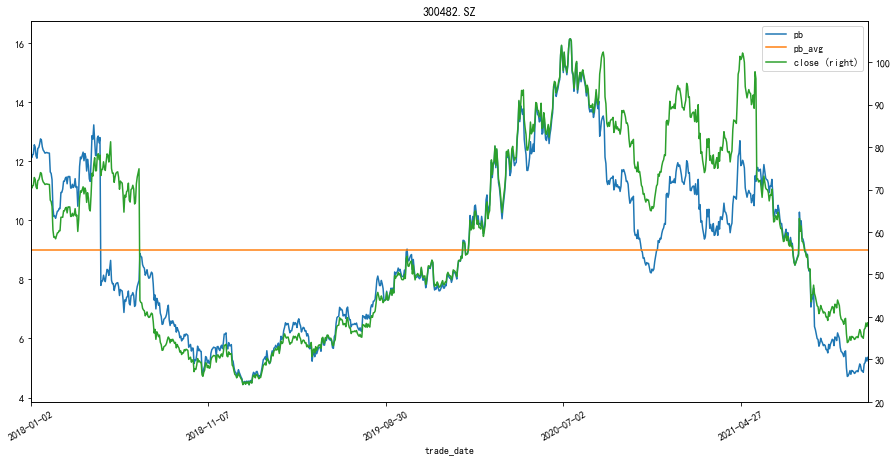

In [2]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
warnings.filterwarnings('ignore')
%matplotlib inline

class Security_PB(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['pb_avg'] = self.df.pb.mean()
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_PB.csv') #存储文件 
        
    def plot(self,data):
        data['pb_avg'] = data['pb'].mean()
#         data[['pb','pb_avg']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30)
        data[['pb','pb_avg','close']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30,secondary_y=['close'])
    def cal(self,data):
        
        data = data[data.index>'2021-01-01']
        print(data[data['close'] < 45])  
if __name__ == "__main__":    
    pro = ts.pro_api()
    df = pro.query('daily_basic', ts_code='300482.SZ',start_date='20090101', end_date='20211129',fields='ts_code,trade_date,pb,close')   

    stock = Security_PB(df)
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_PB.csv',index_col='trade_date')
    data = data.loc['2018-01-01':'2021-11-29']  #选取时间段
    stock.plot(data) 
    stock.cal(data)

## 微博舆情报告  
CNHOUR2	2小时  
CNHOUR6	6小时  
CNHOUR12	12小时  
CNHOUR24	1天  
CNDAY7	1周  
CNDAY30	1月    
https://datacenter.jin10.com/market



In [261]:
import akshare as ak
df = ak.stock_js_weibo_report(time_period="CNDAY30")
df.index = df.pop('name')



In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>